In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sweetviz as sv
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.datasets import make_imbalance
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [30]:
mushroom_data = pd.read_csv("mushrooms.csv")
credit_card_fault_data = pd.read_csv('UCI_Credit_Card.csv')
bank_note_dataset = pd.read_csv("BankNote_Authentication.csv")

In [20]:
data1_analyzed = sv.analyze(mushroom_data)
data2_amalyzed = sv.analyze(credit_card_fault_data)
data3_analyzed = sv.analyze(bank_note_dataset)

                                             |                                             | [  0%]   00:00 ->…

                                             |                                             | [  0%]   00:00 ->…

                                             |                                             | [  0%]   00:00 ->…


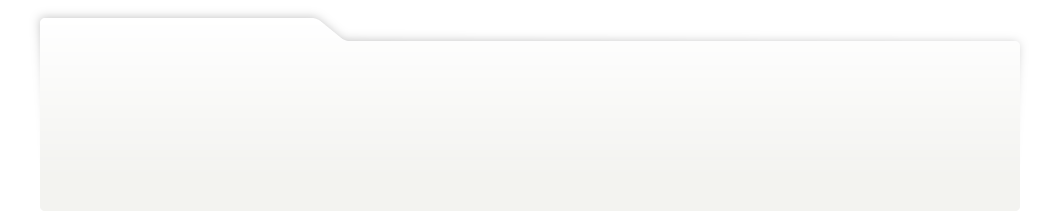
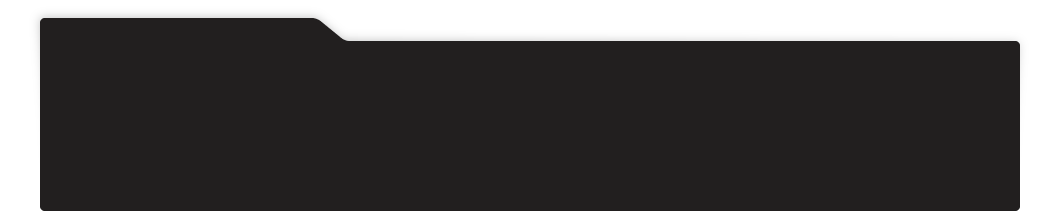
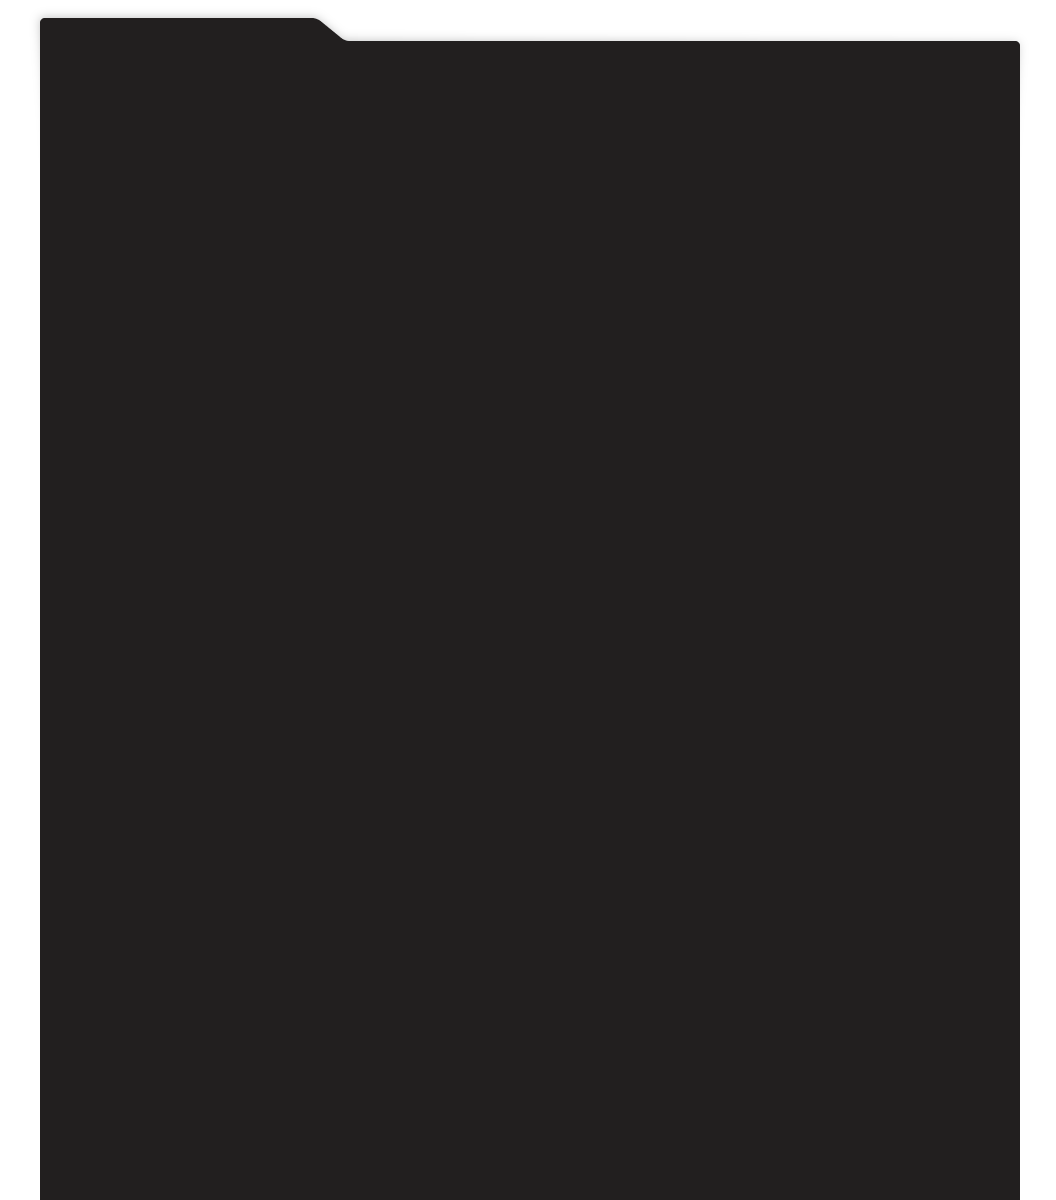
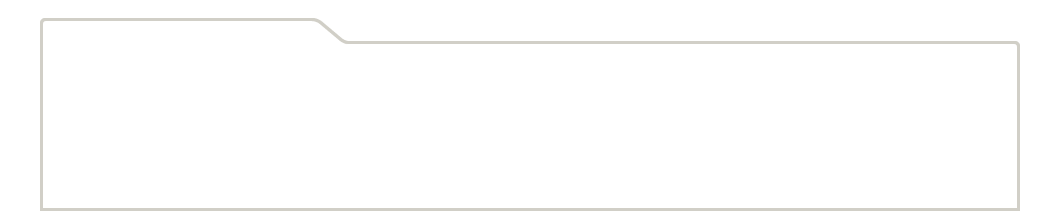
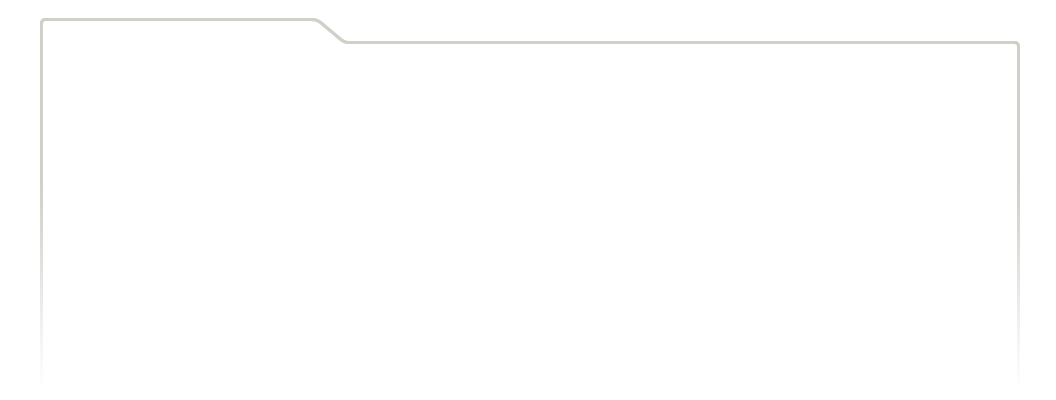
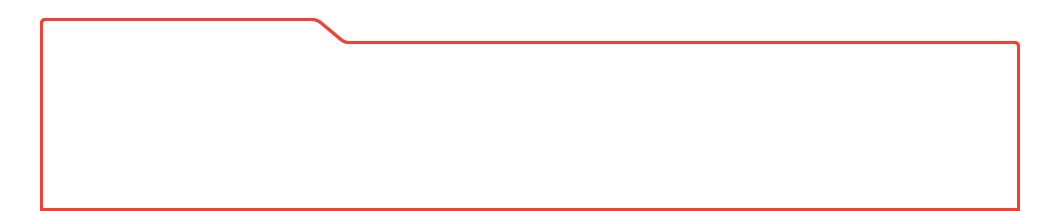
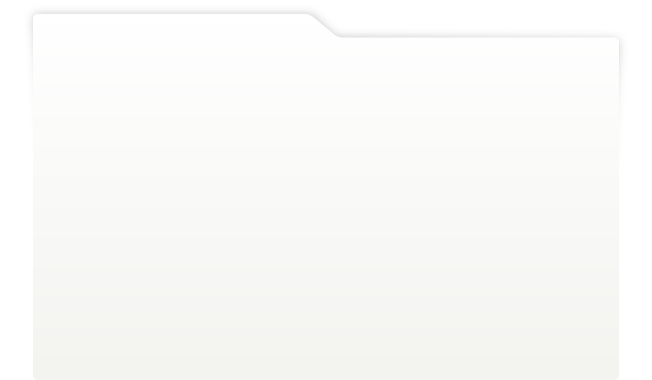
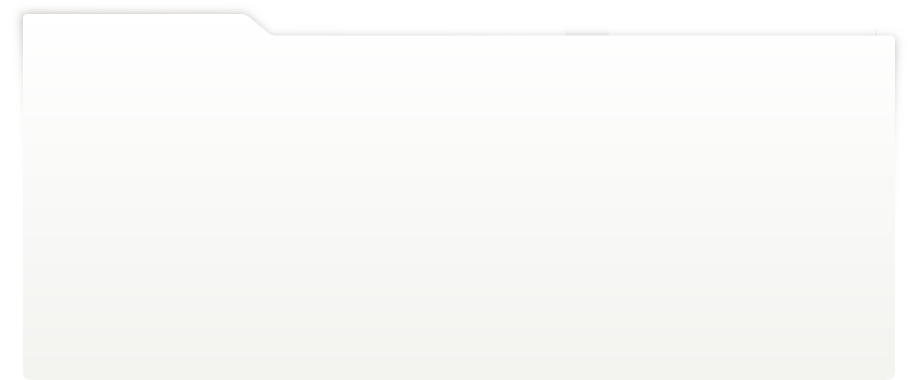
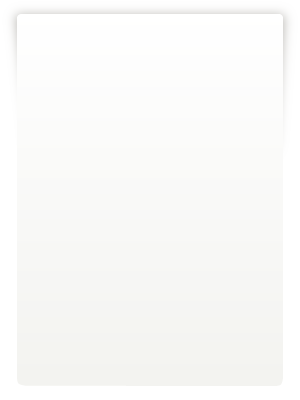
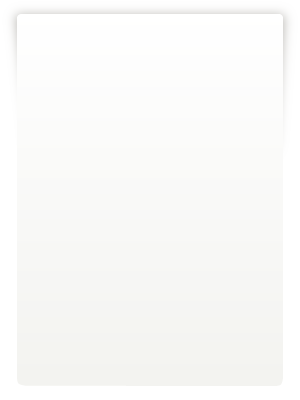
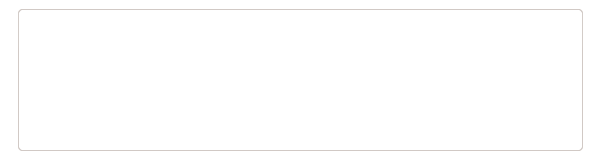
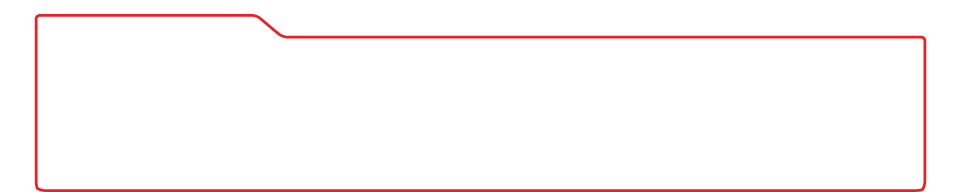
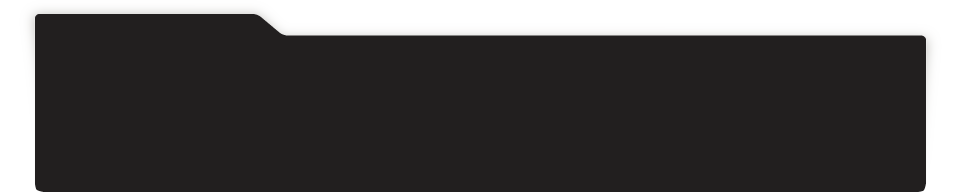
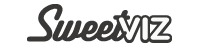
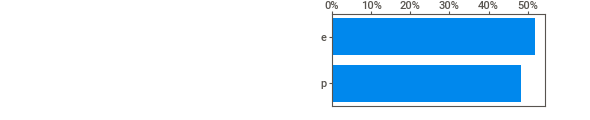
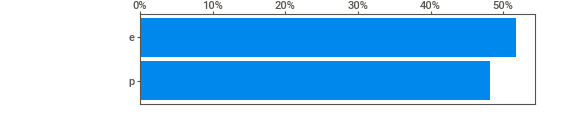
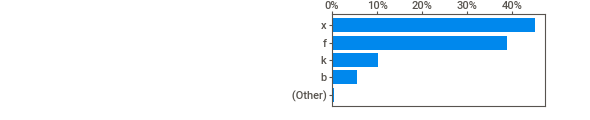
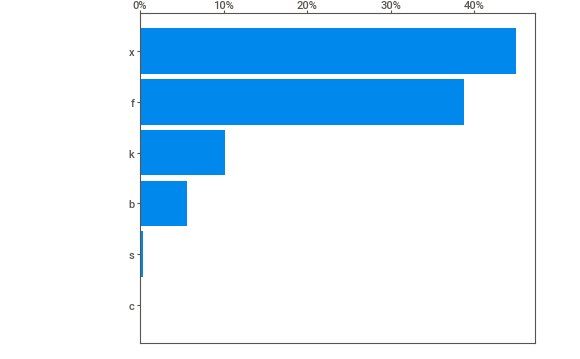
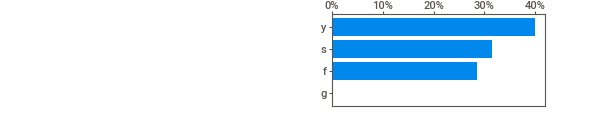
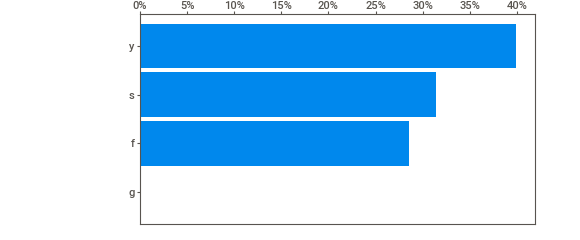
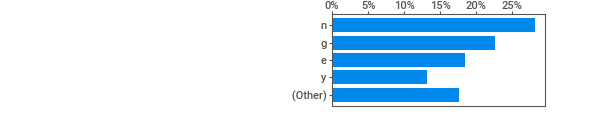
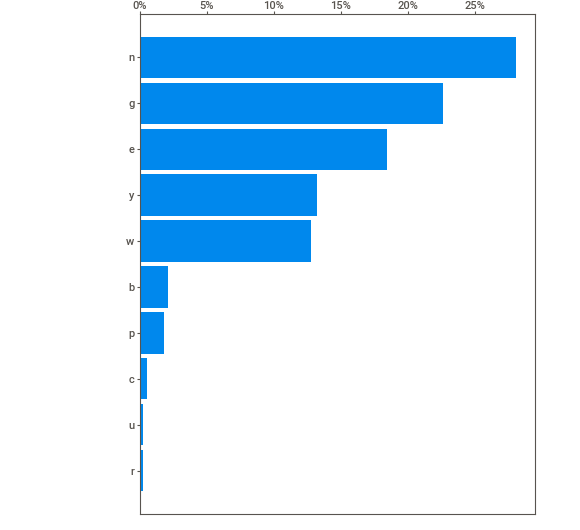
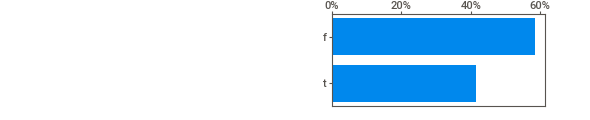
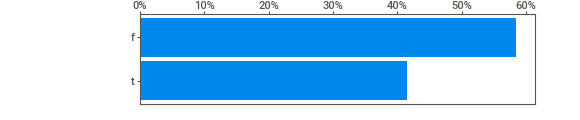
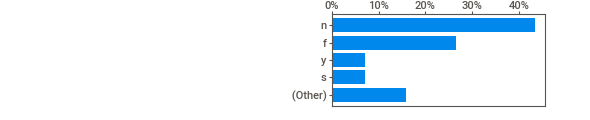
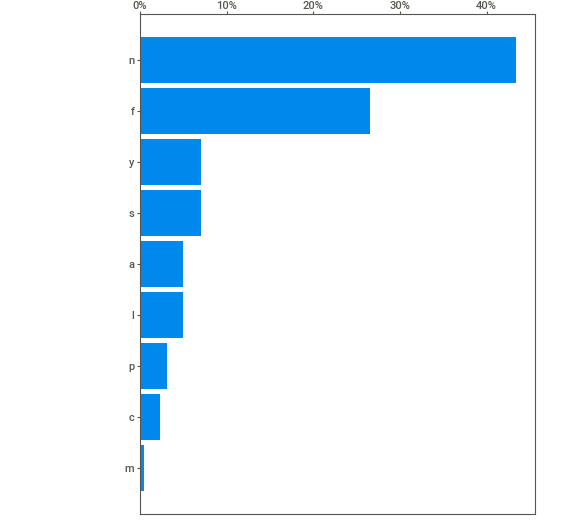
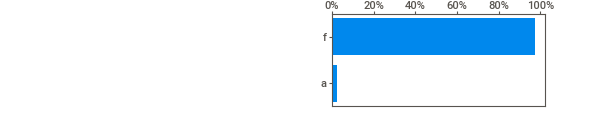
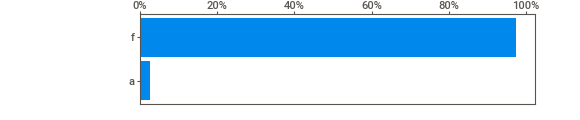
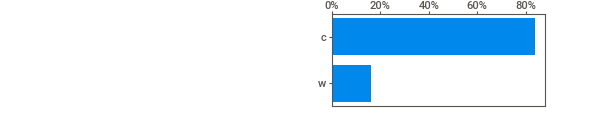
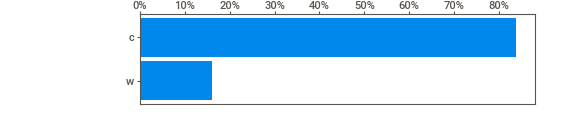
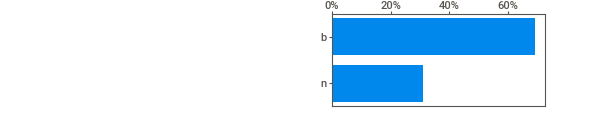
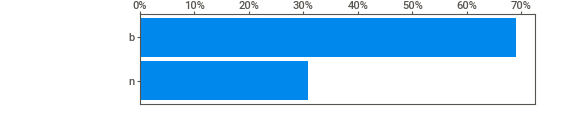
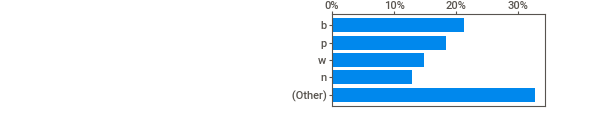
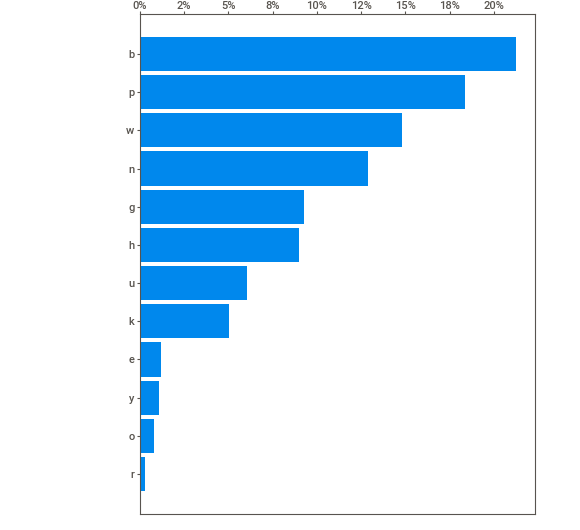
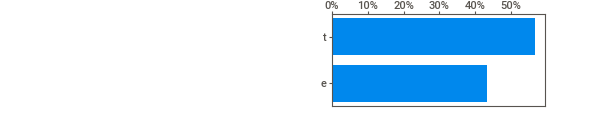
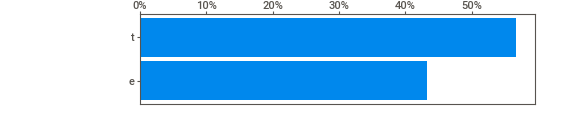
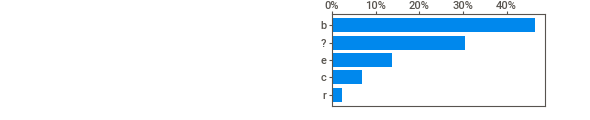
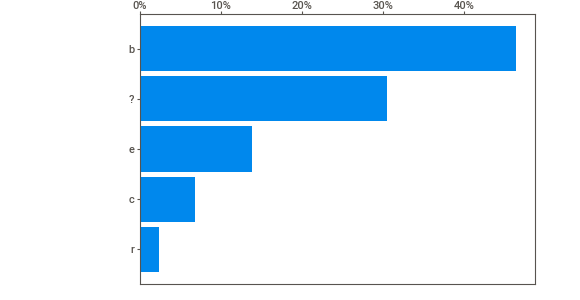
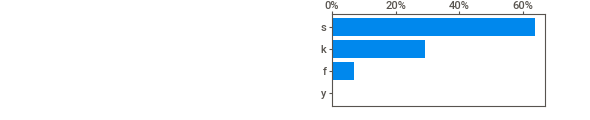
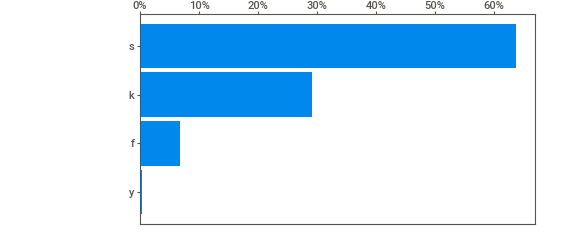
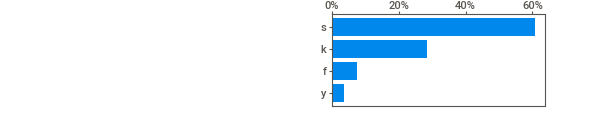
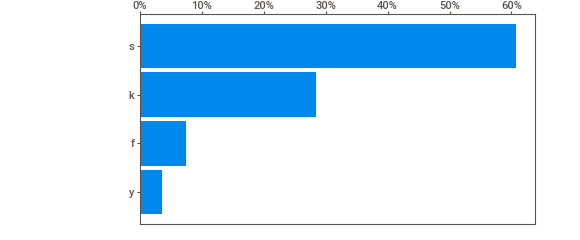
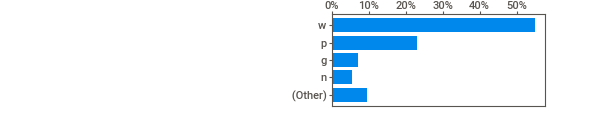
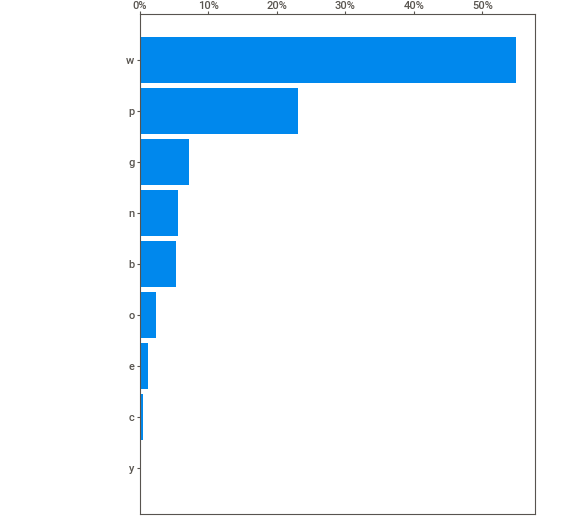
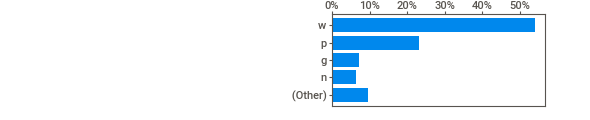
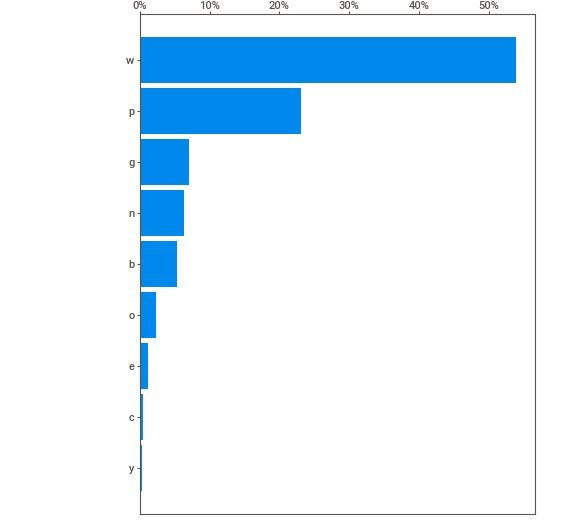
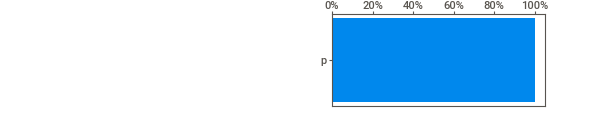
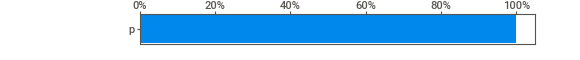
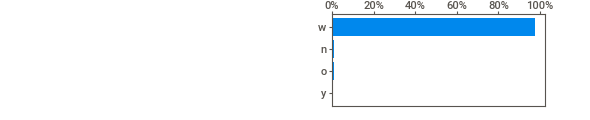
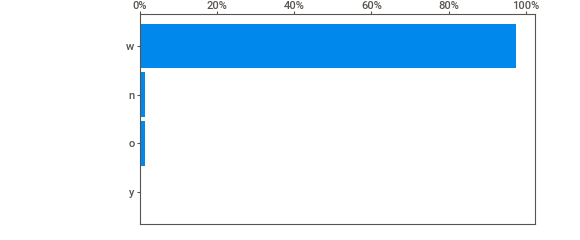
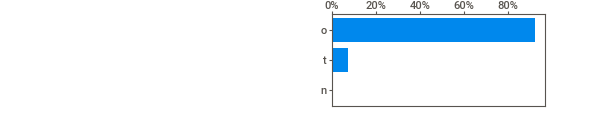
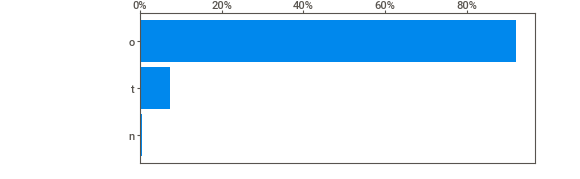
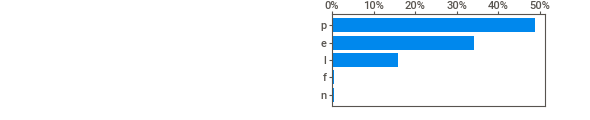
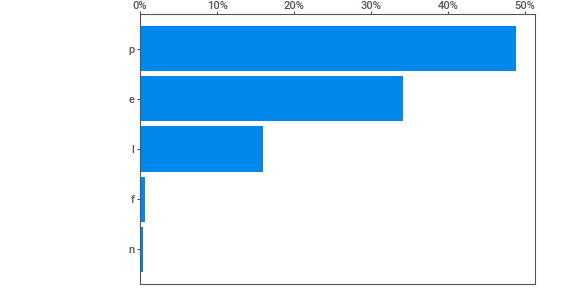
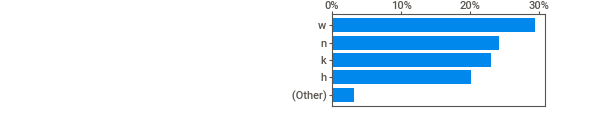
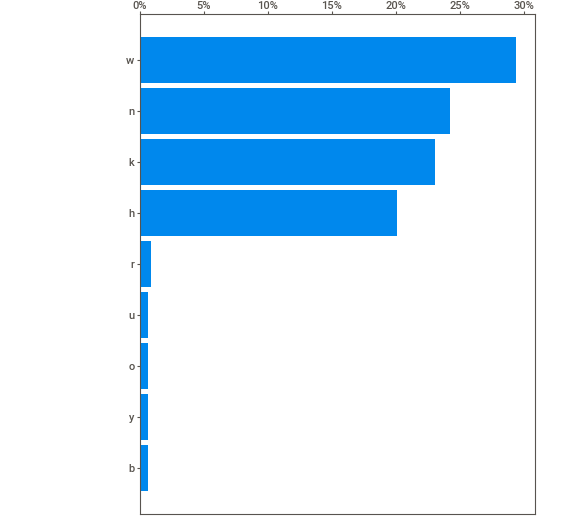
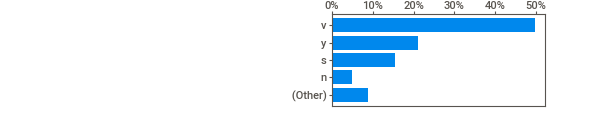
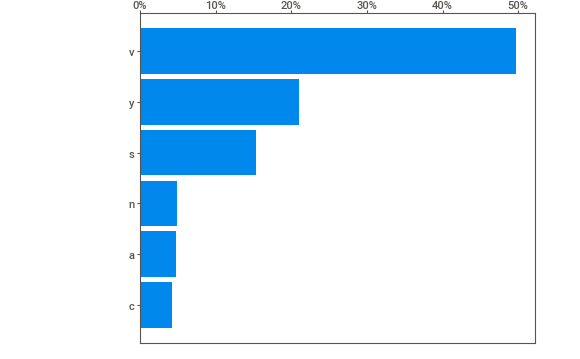
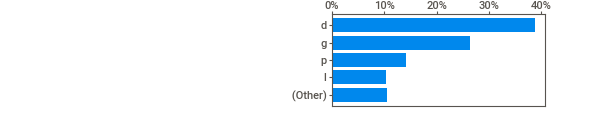
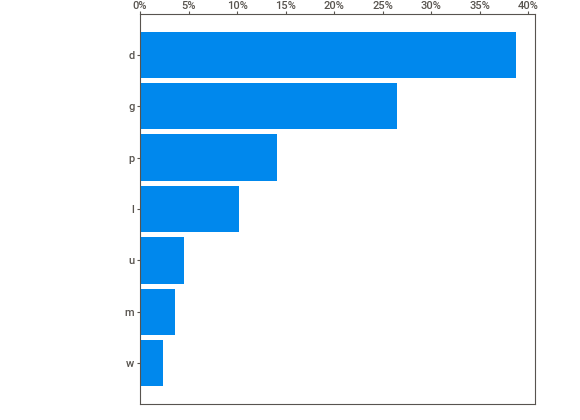
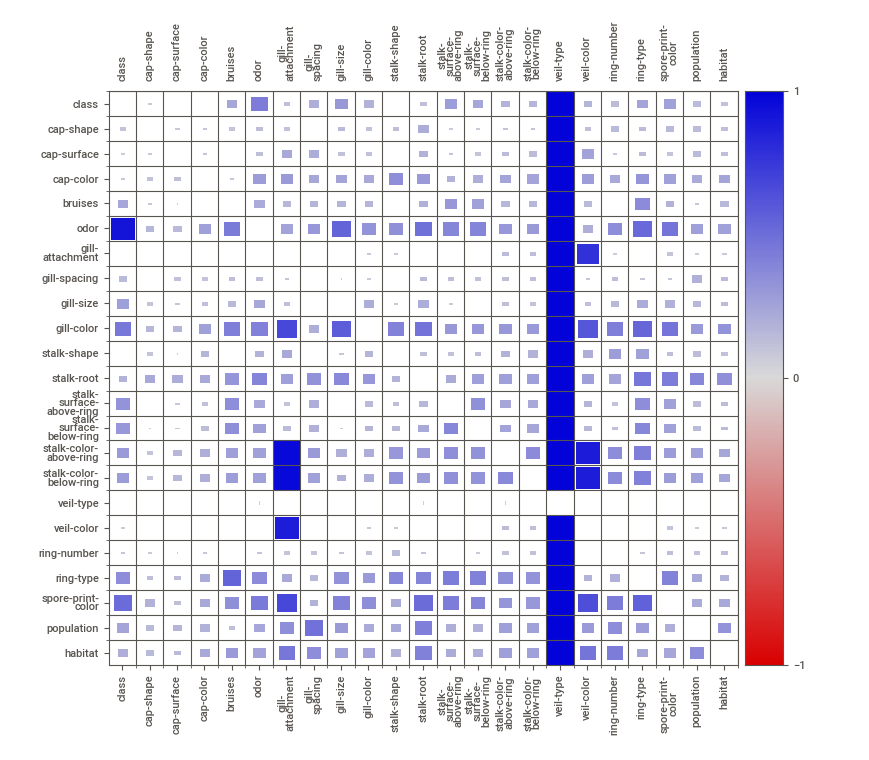
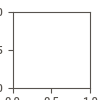

In [24]:
data1_analyzed.show_notebook()


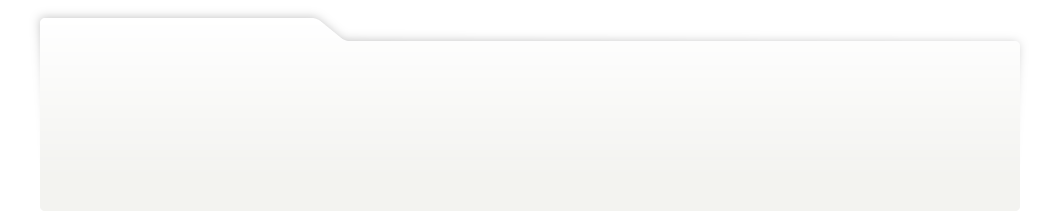
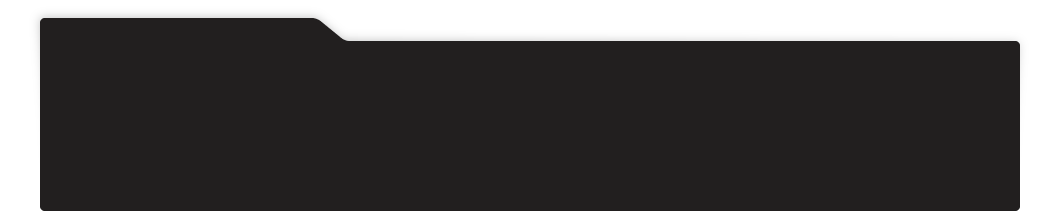
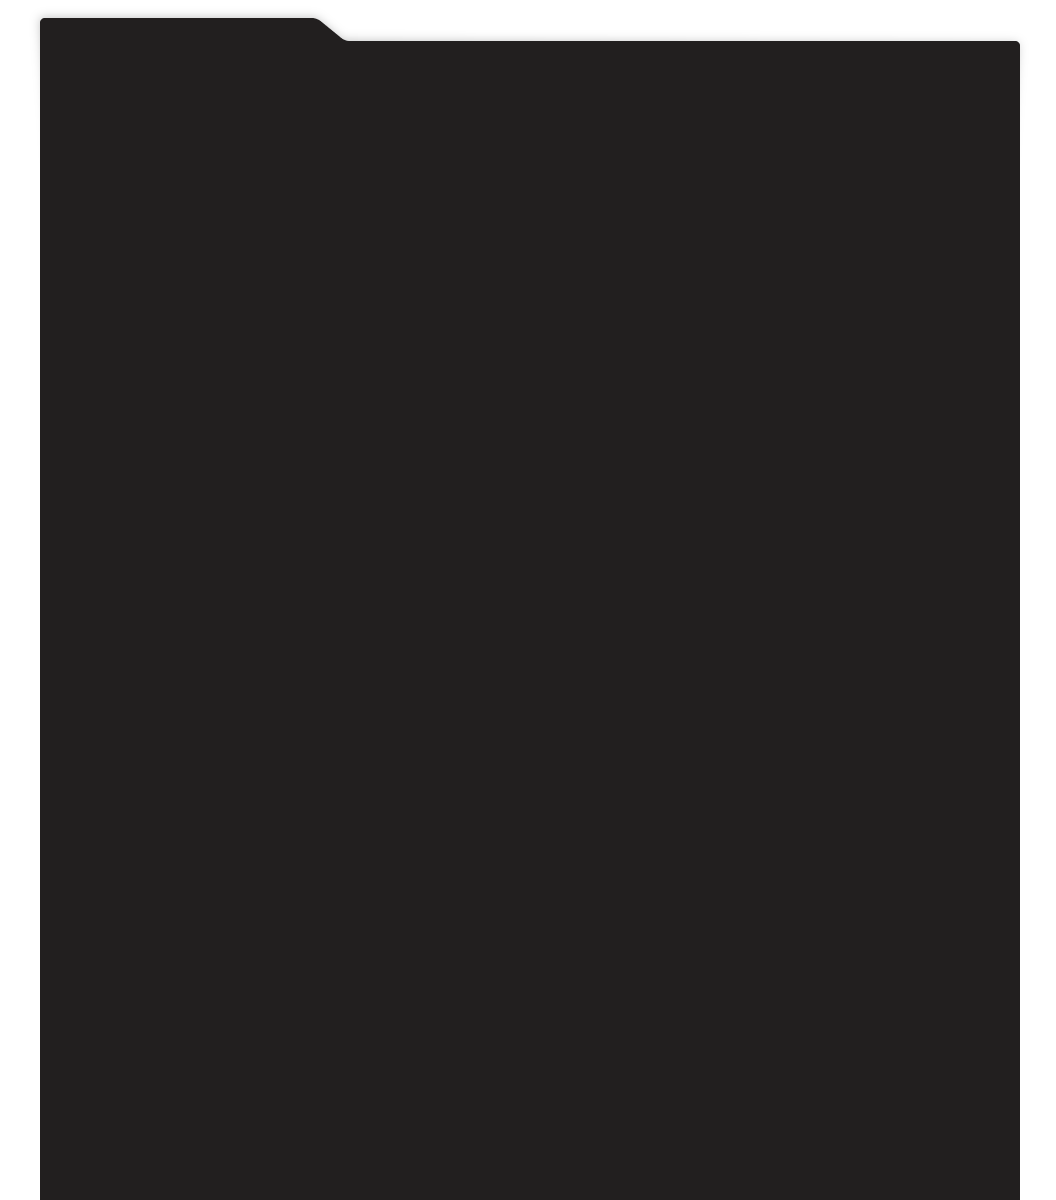
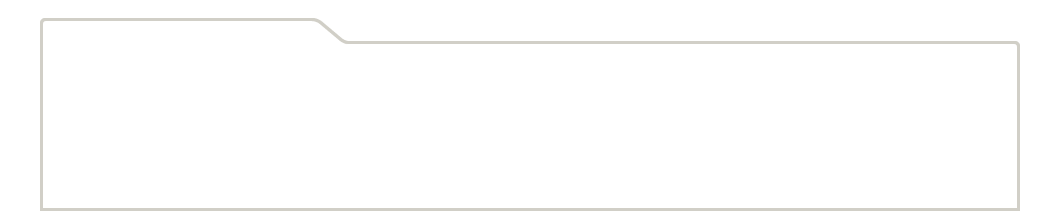
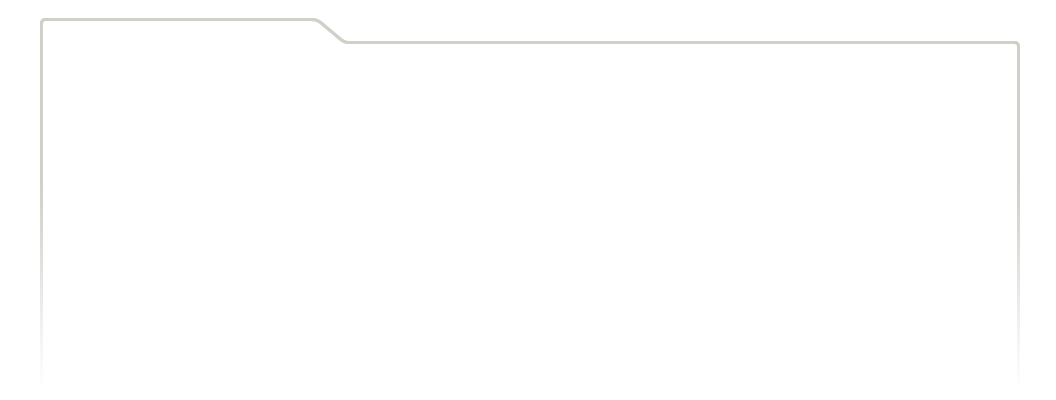
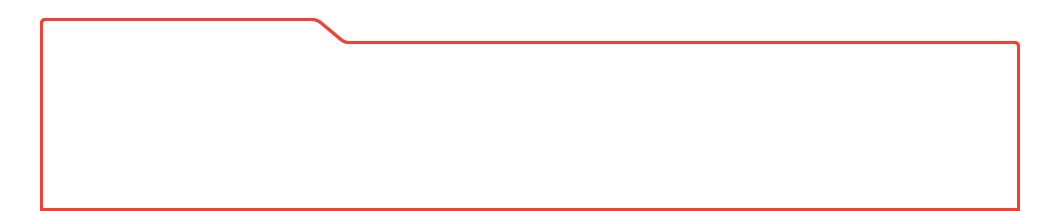
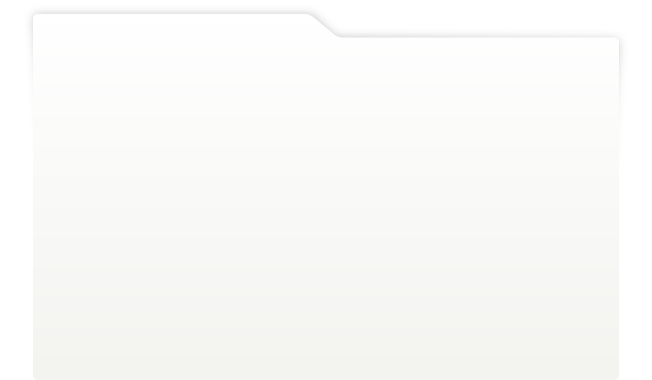
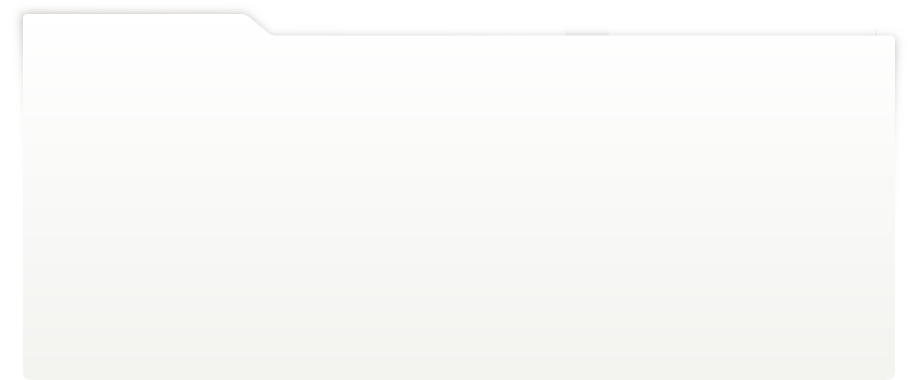
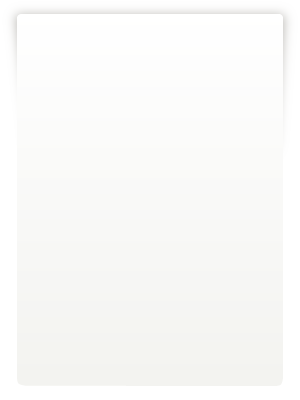
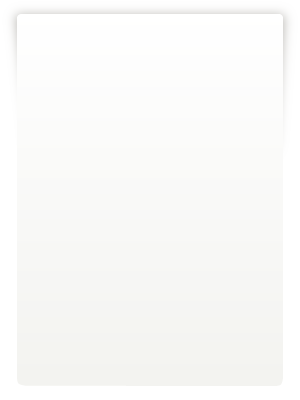
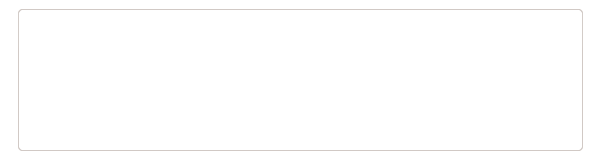
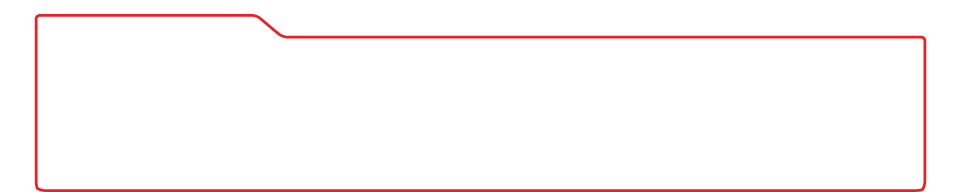
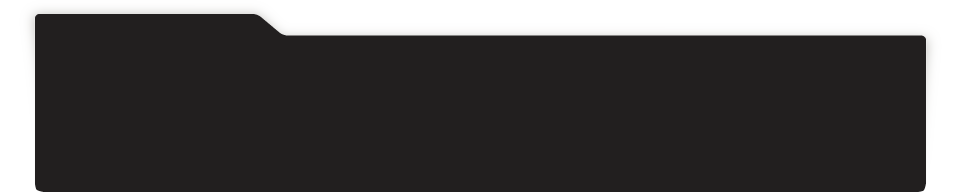
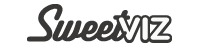
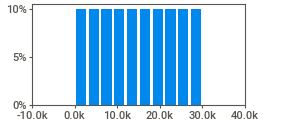
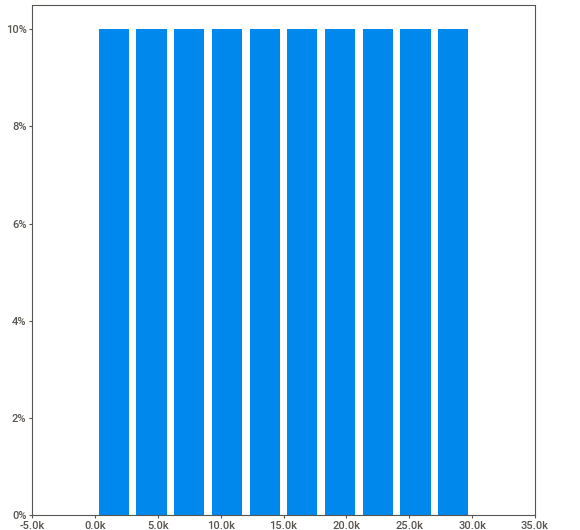
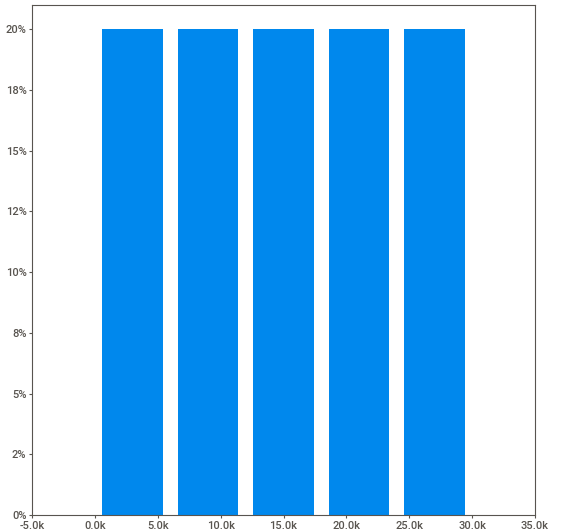
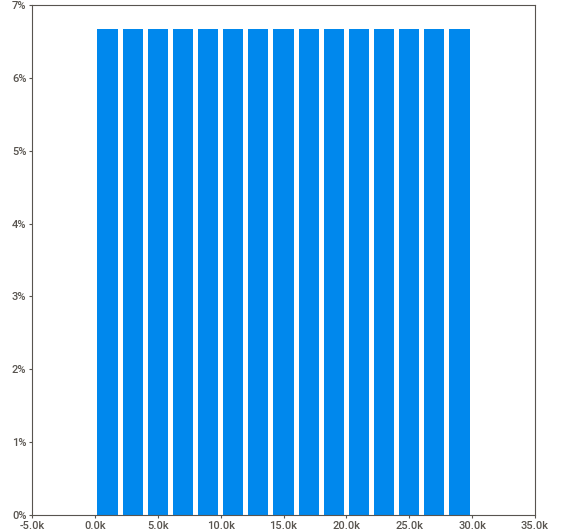
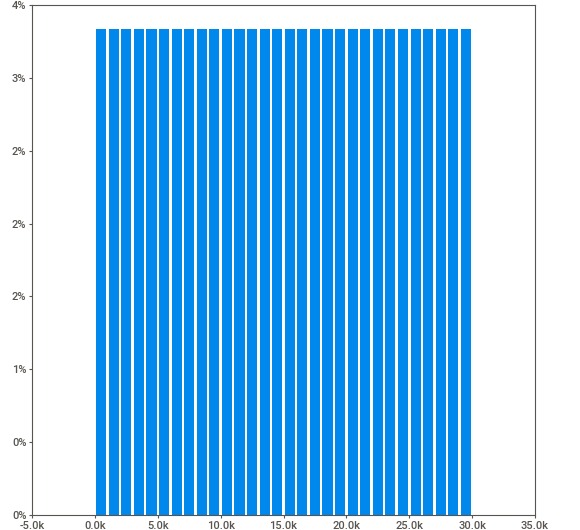
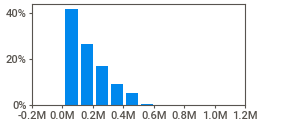
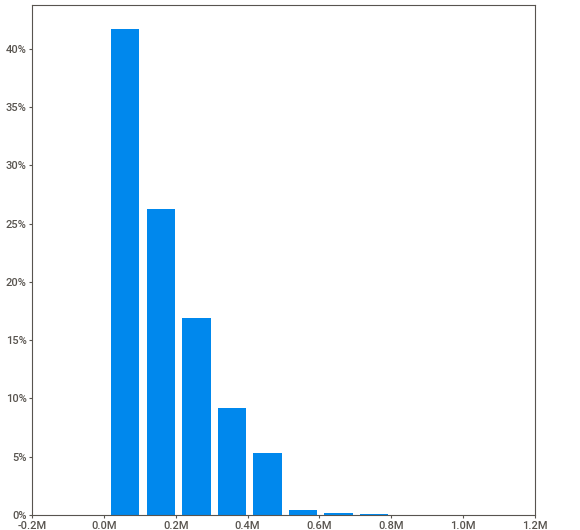
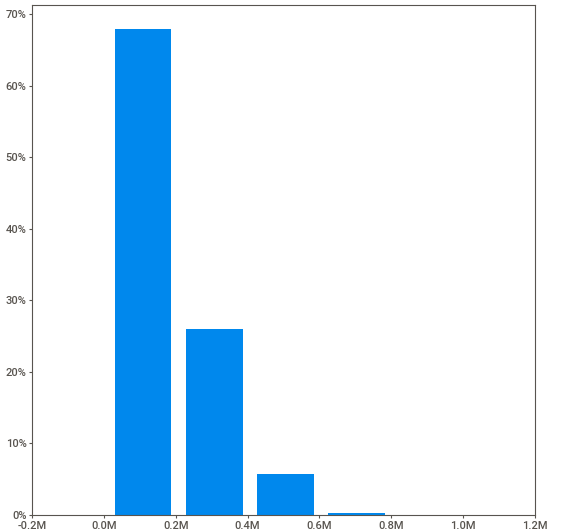
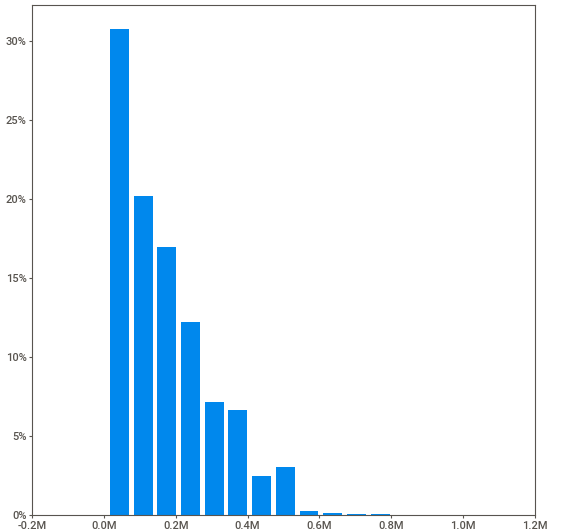
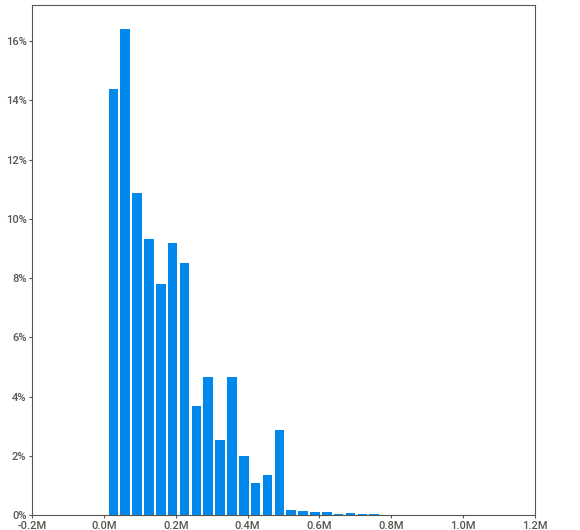
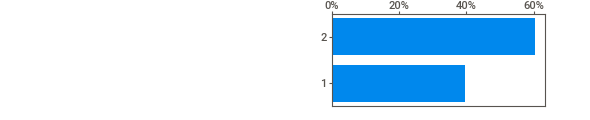
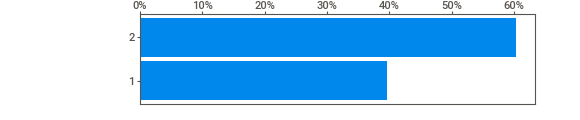
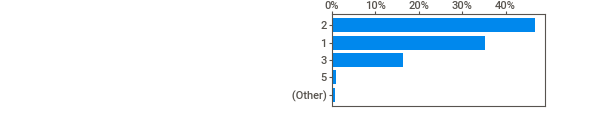
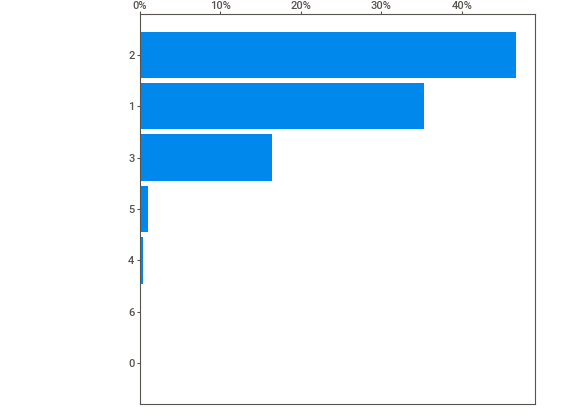
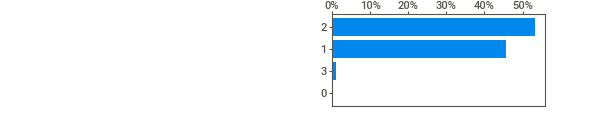
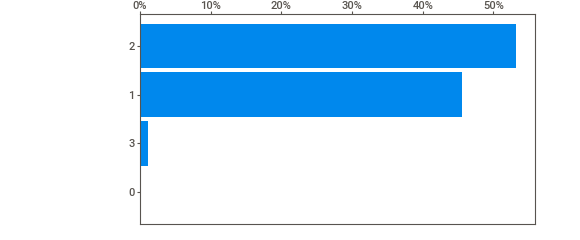
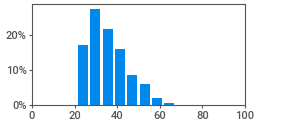
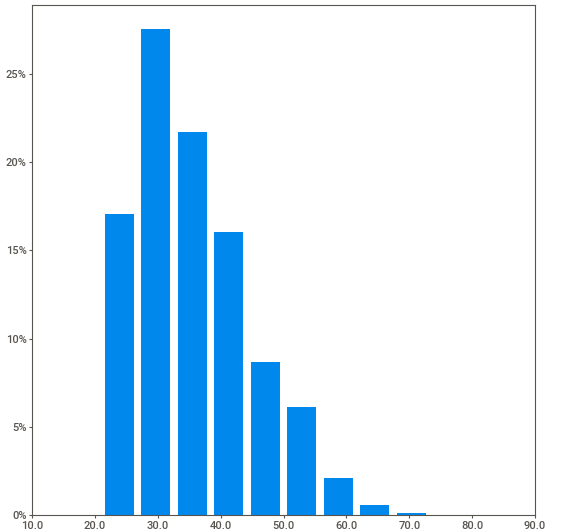
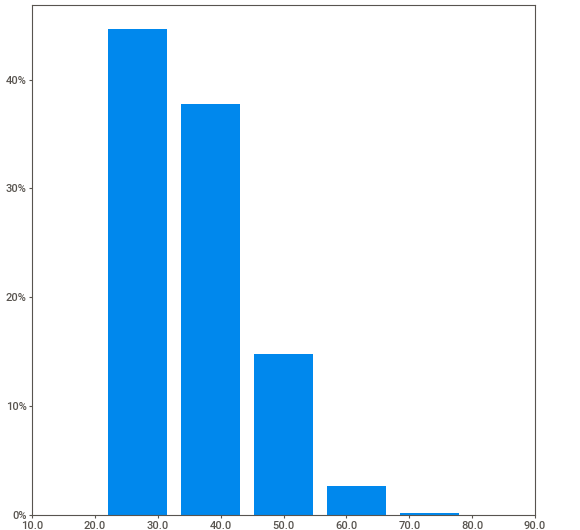
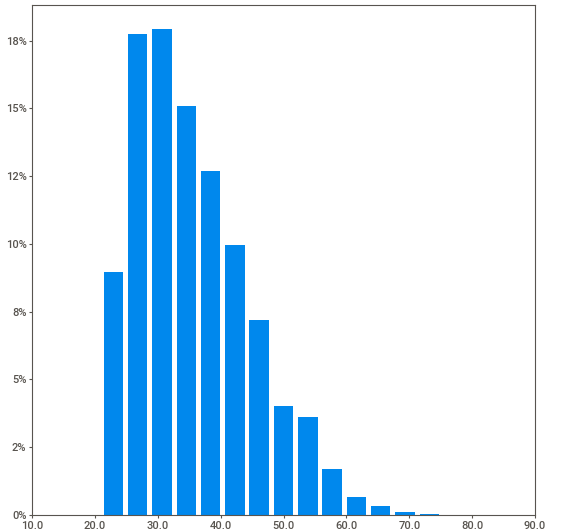
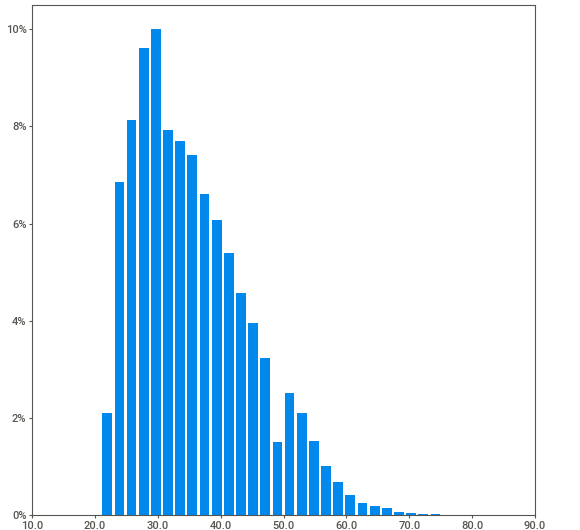
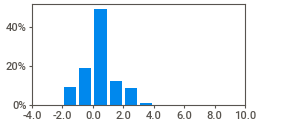
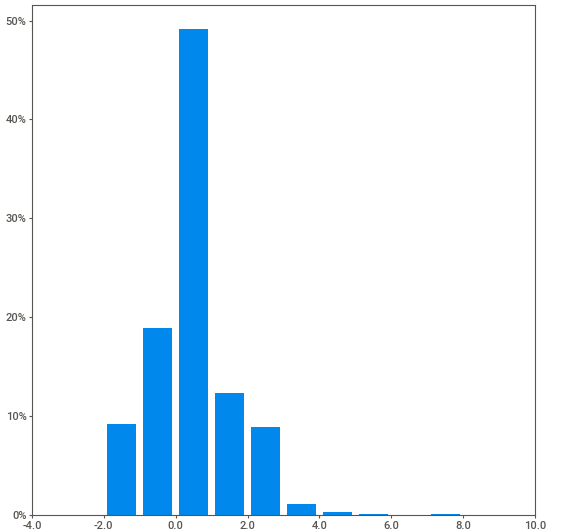
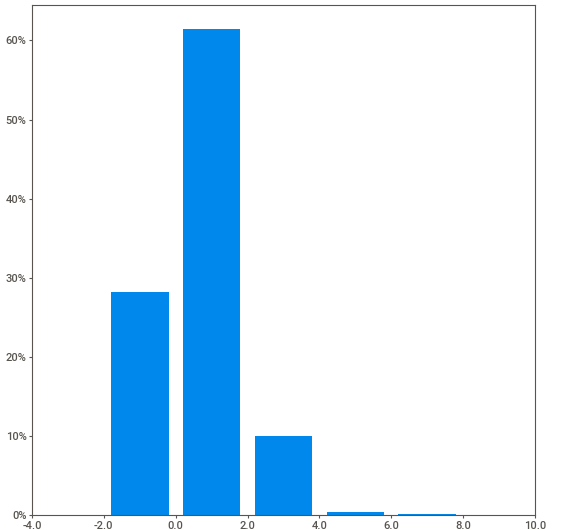
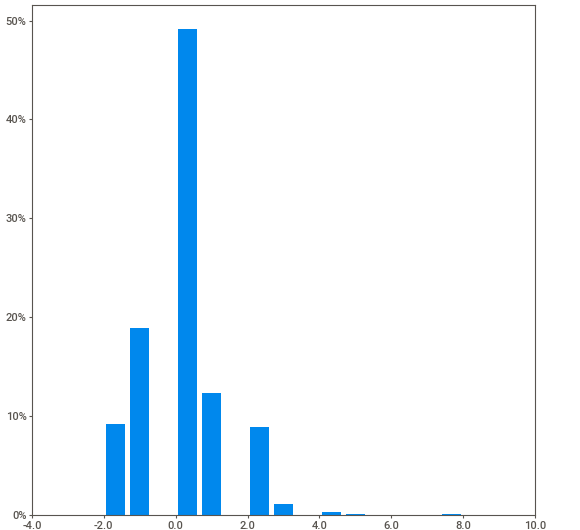
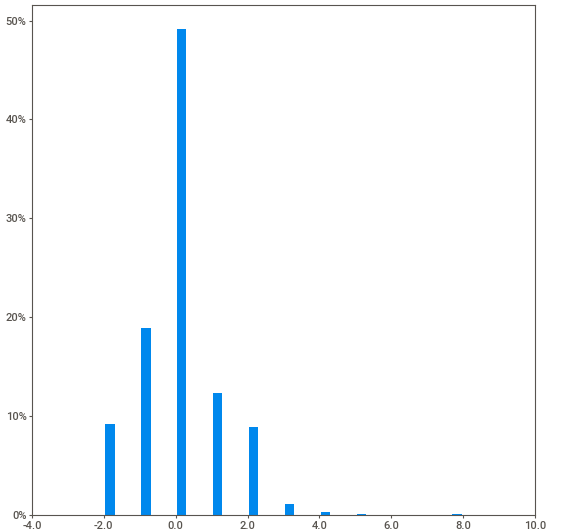
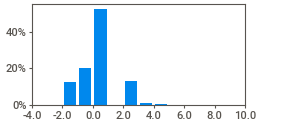
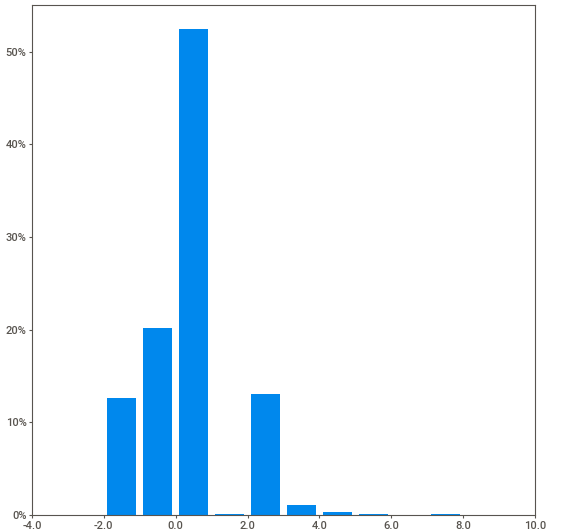
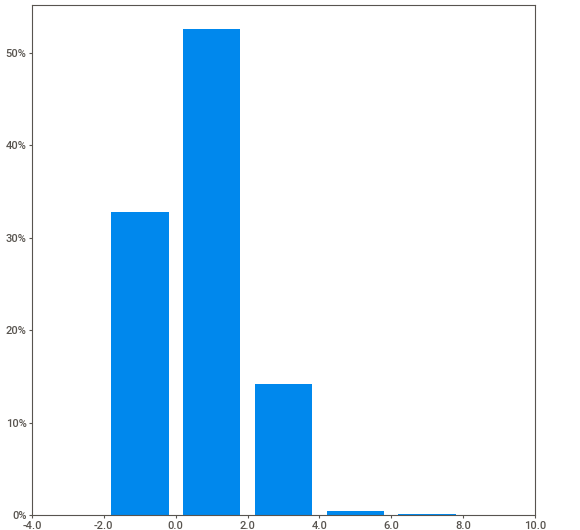
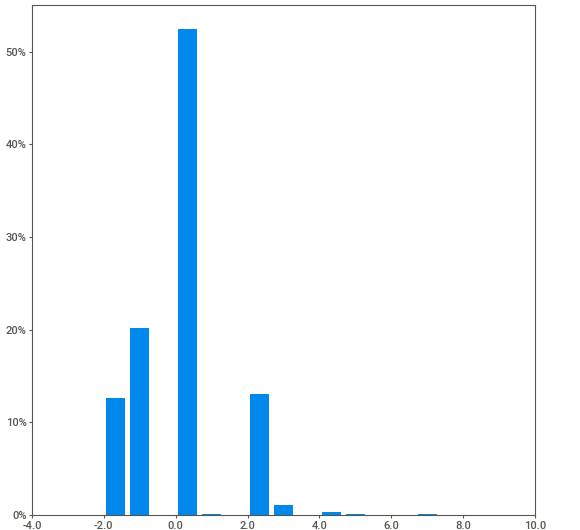
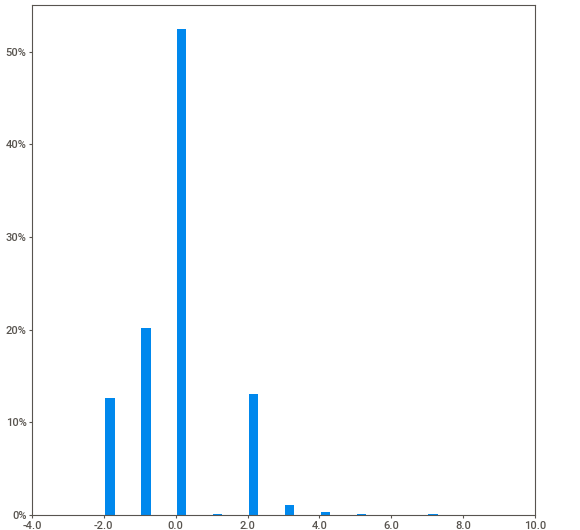
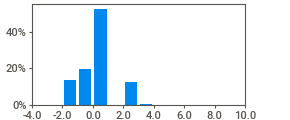
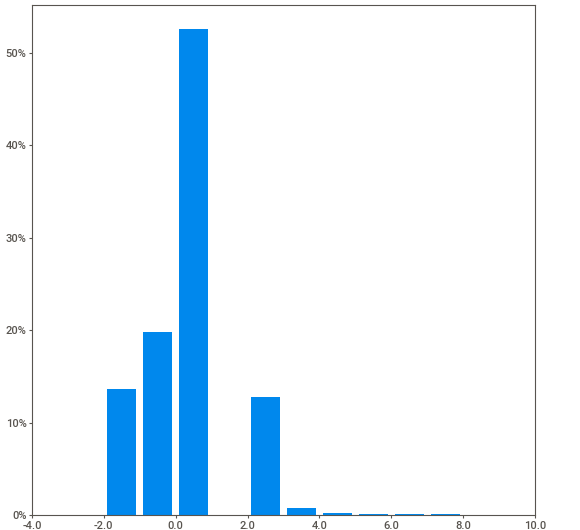
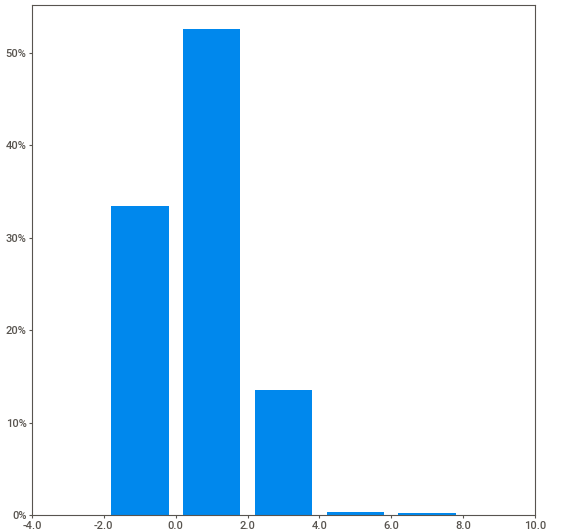
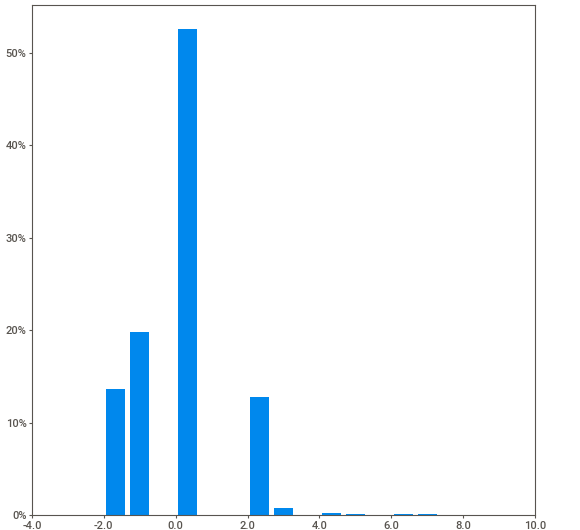
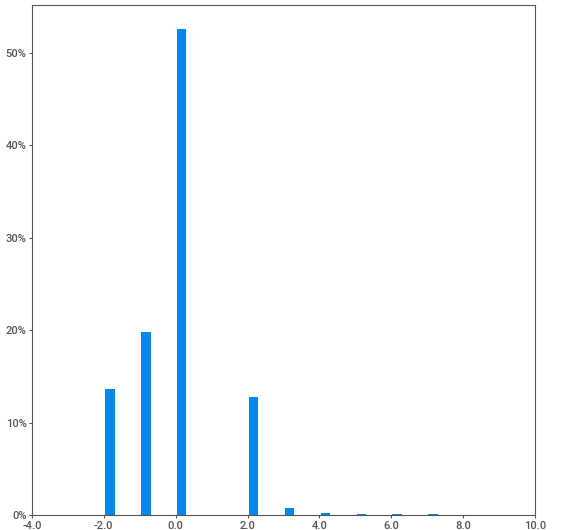
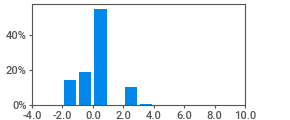
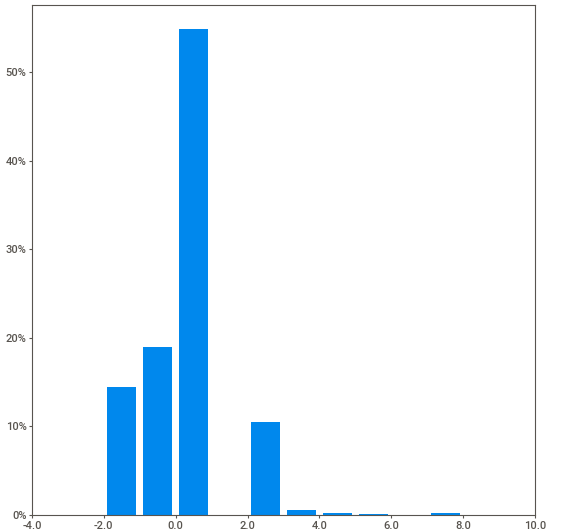
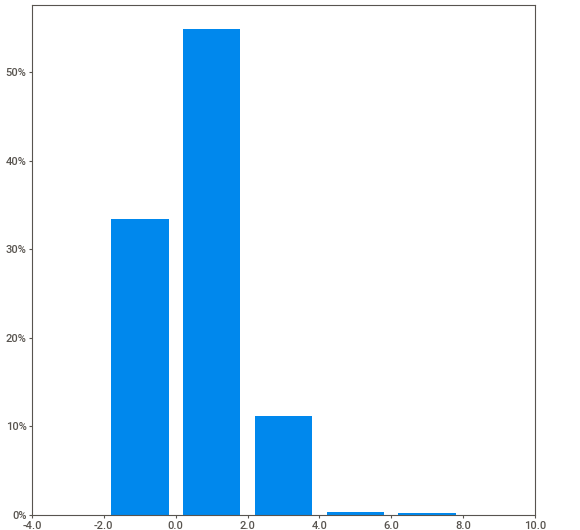
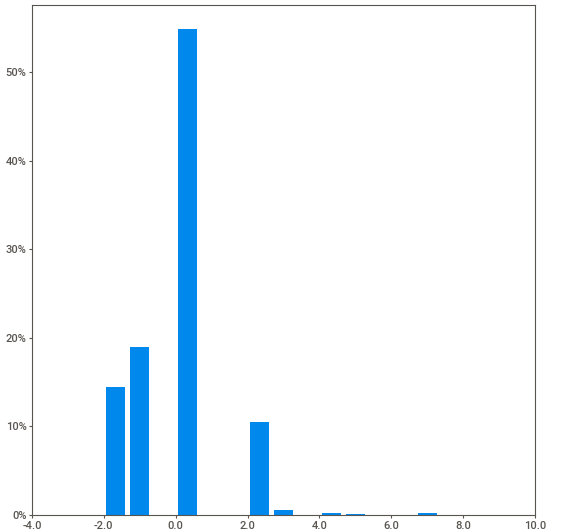
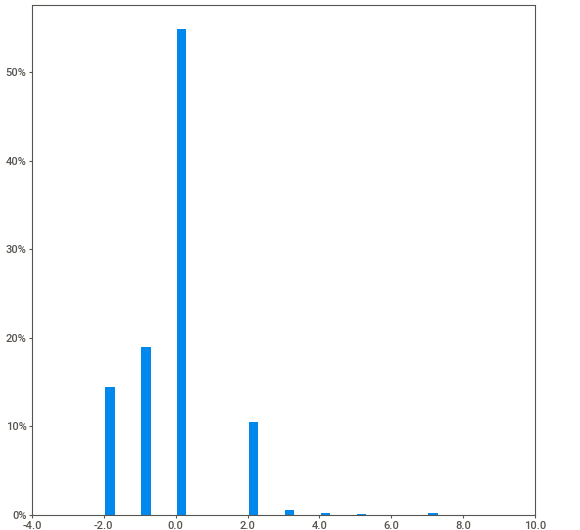
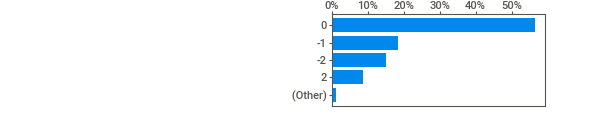
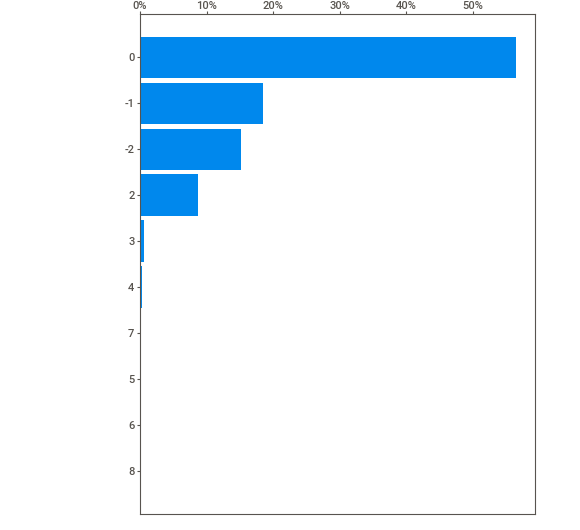
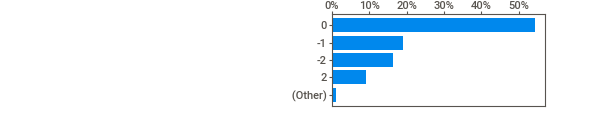
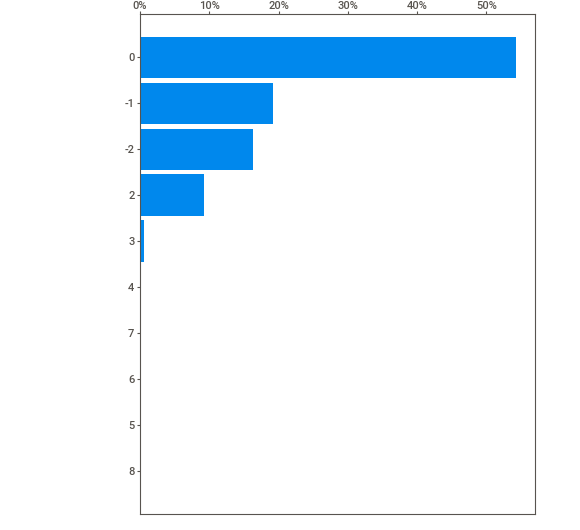
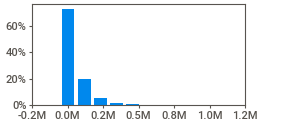
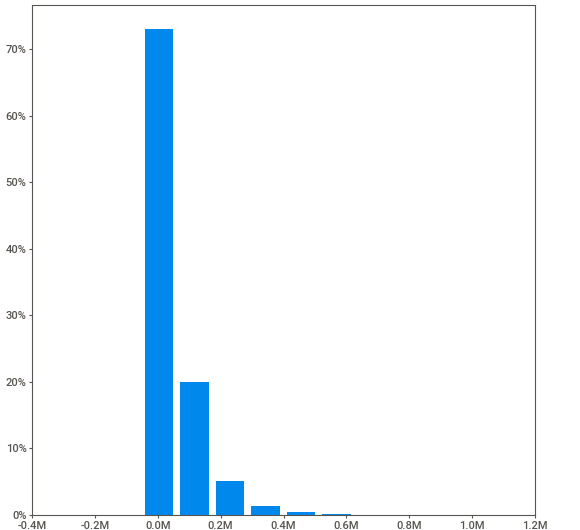
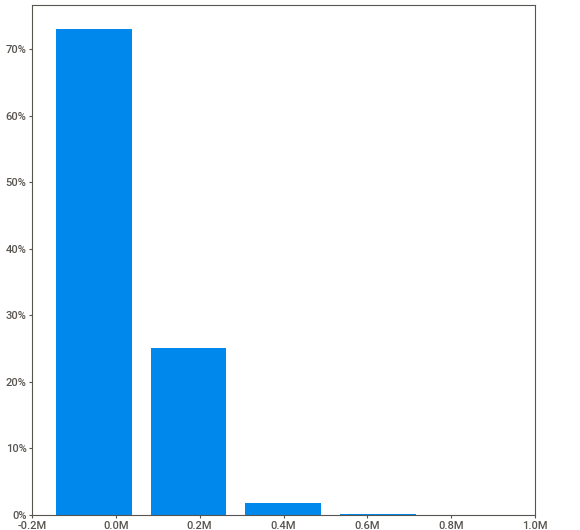
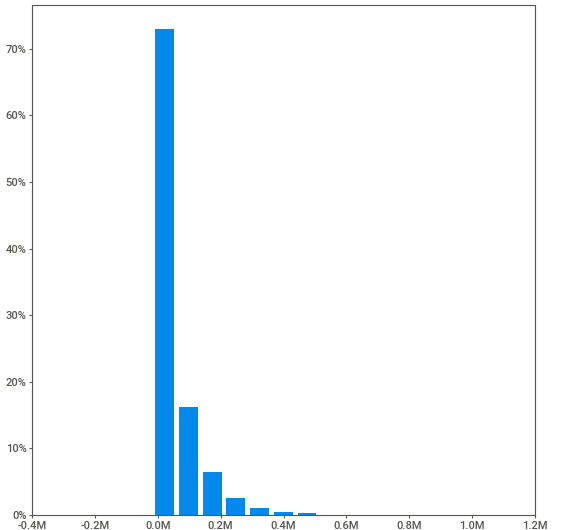
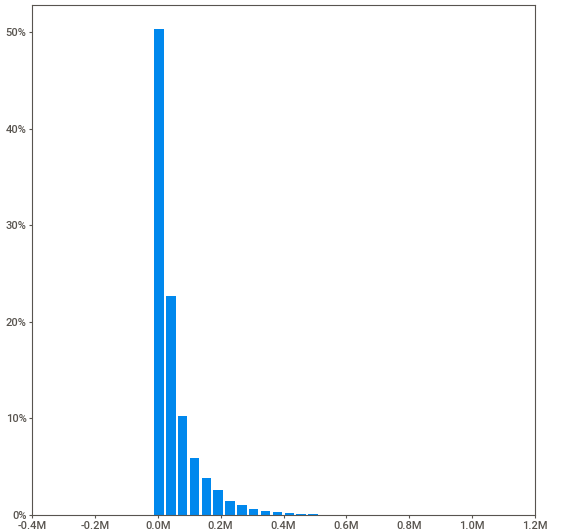
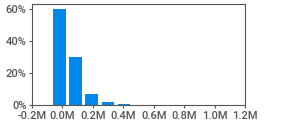
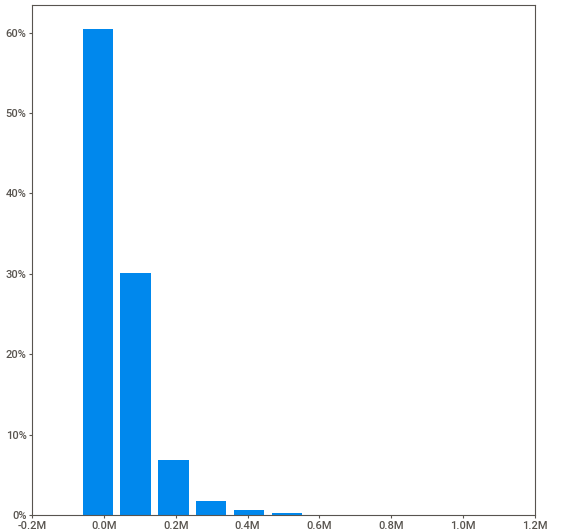
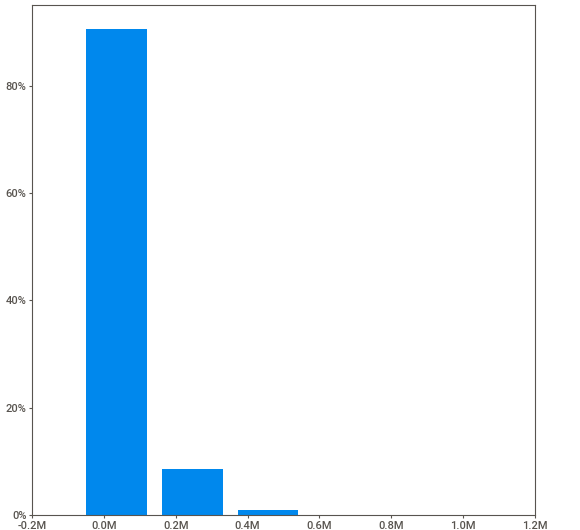
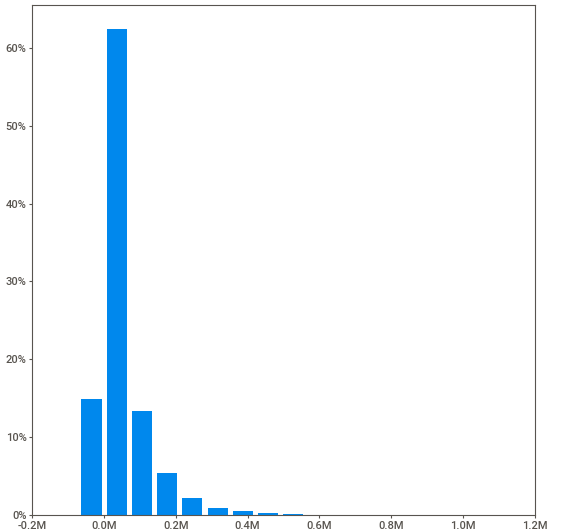
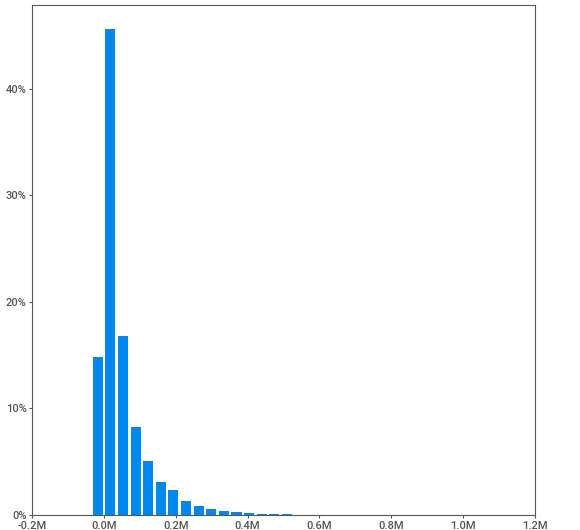
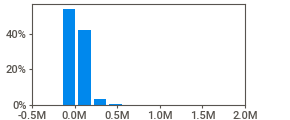
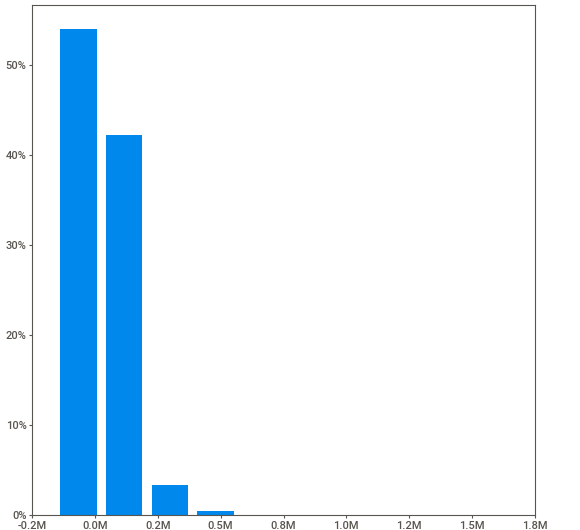
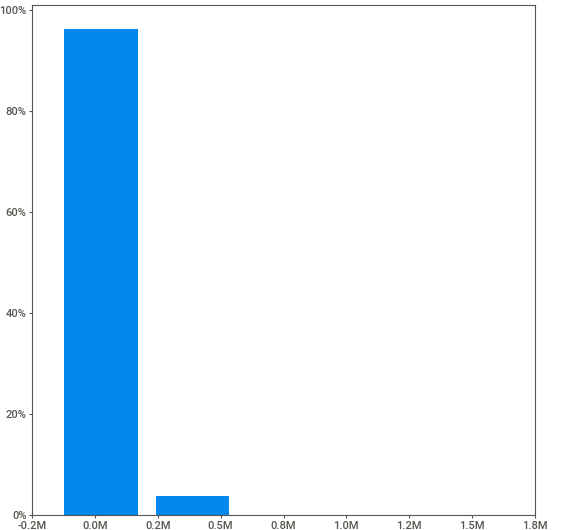
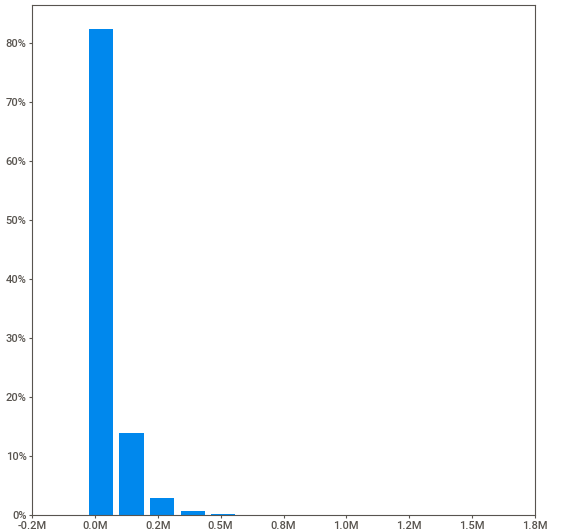
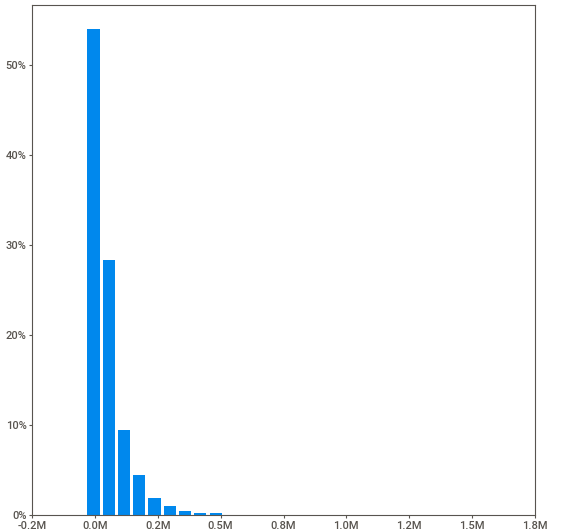
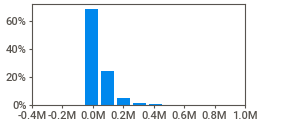
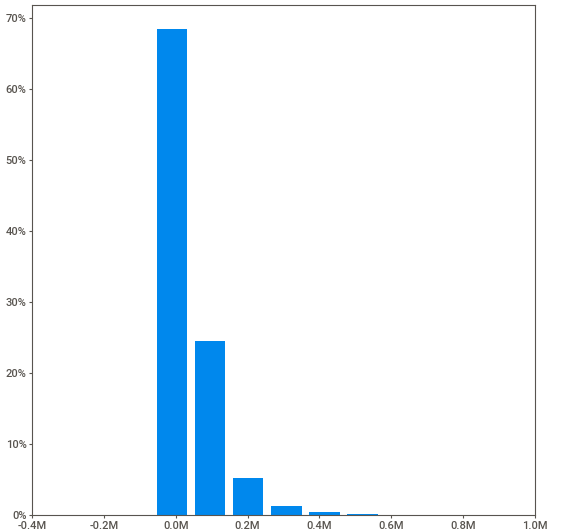
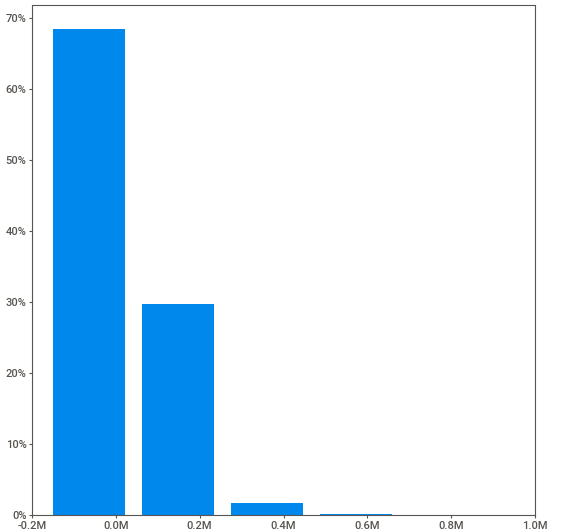
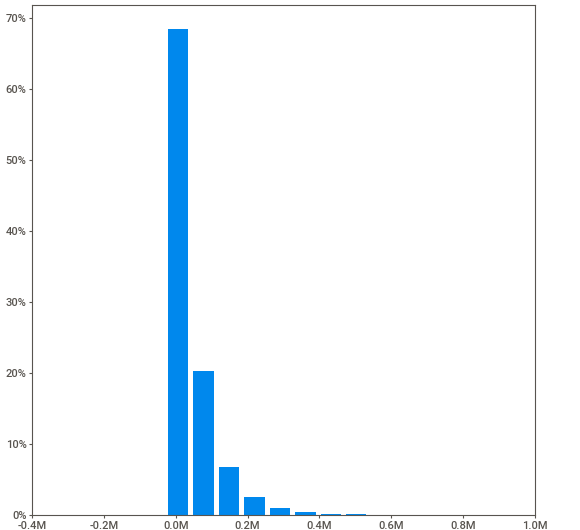
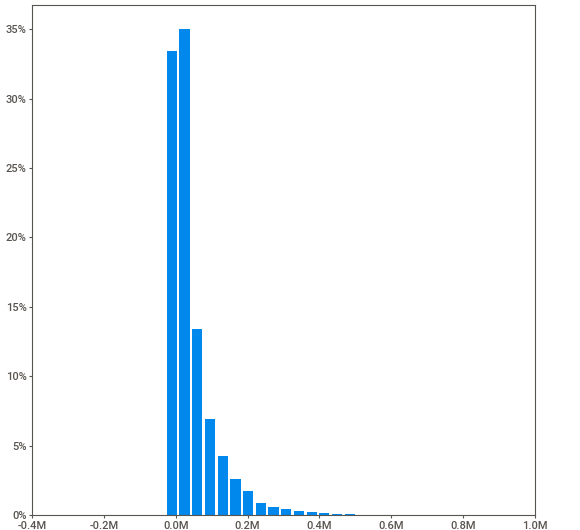
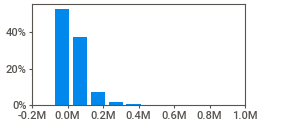
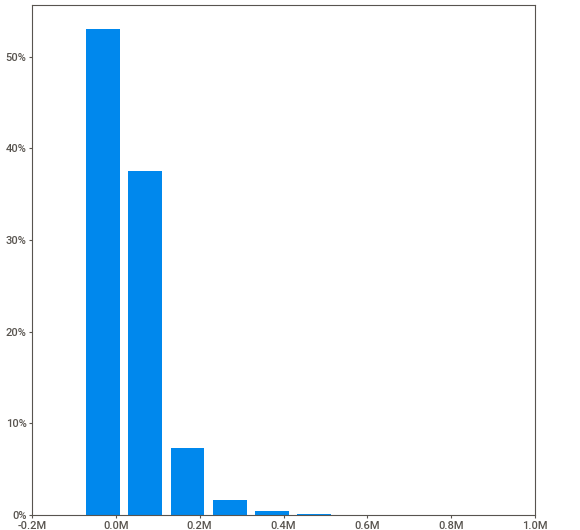
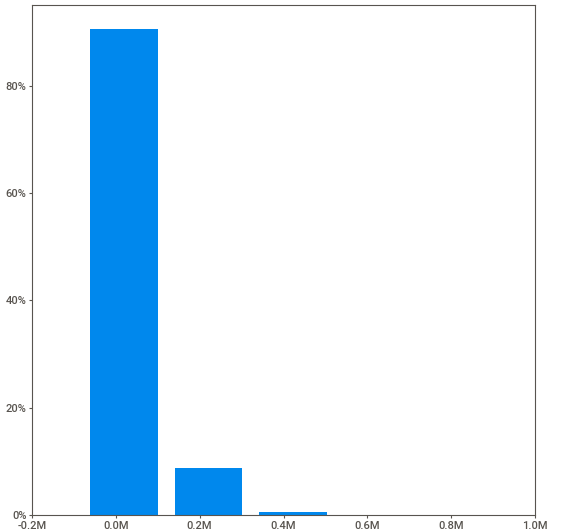
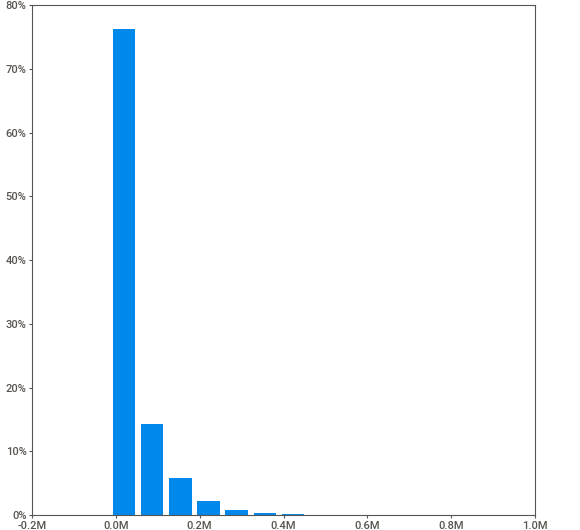
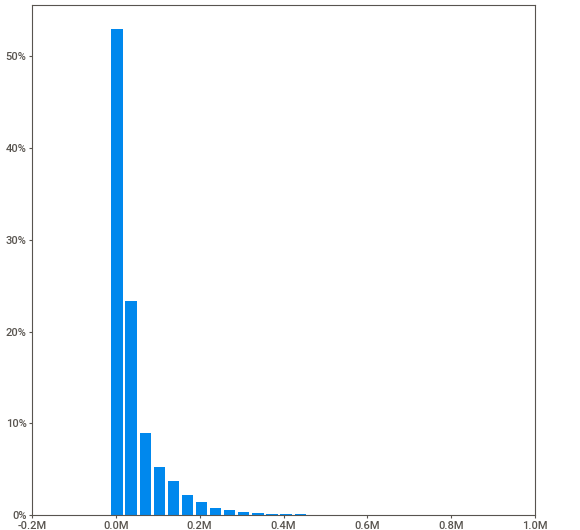
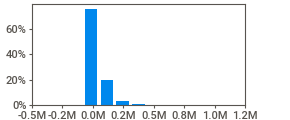
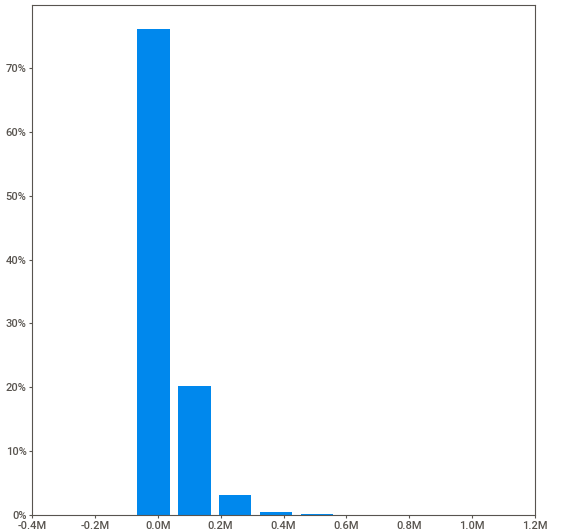
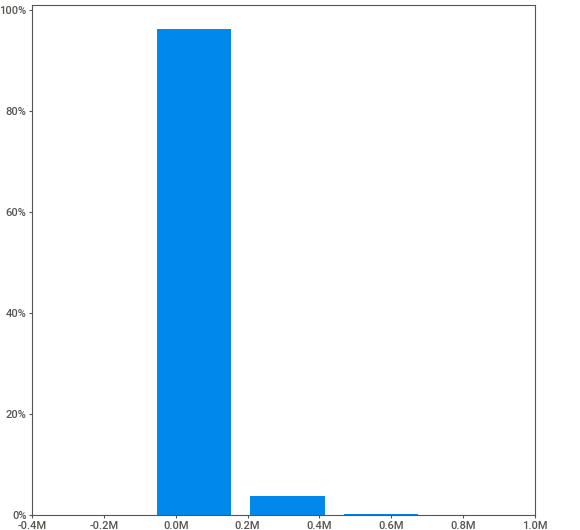
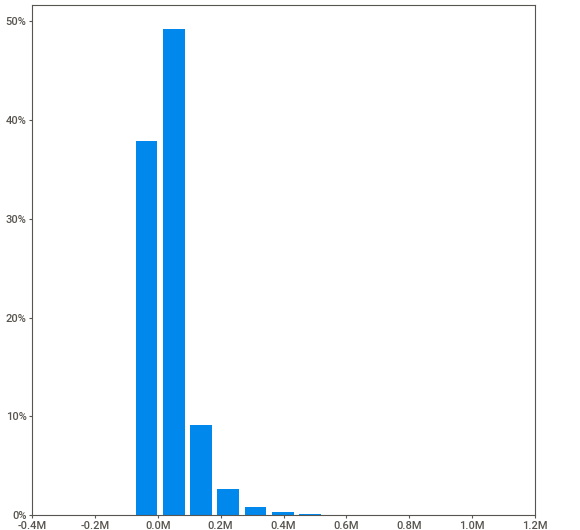
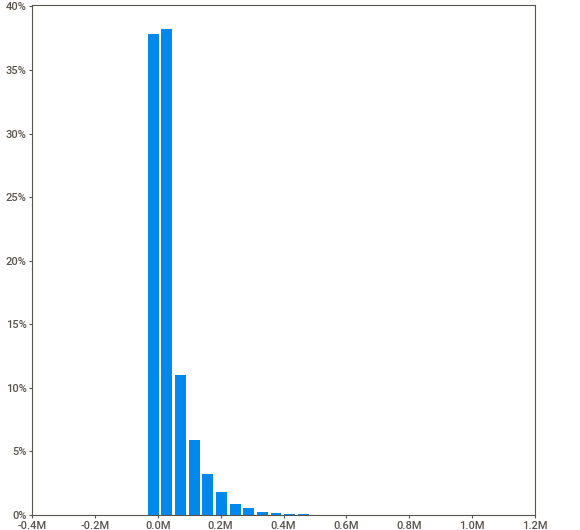
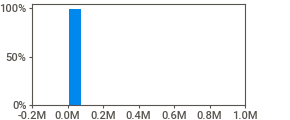
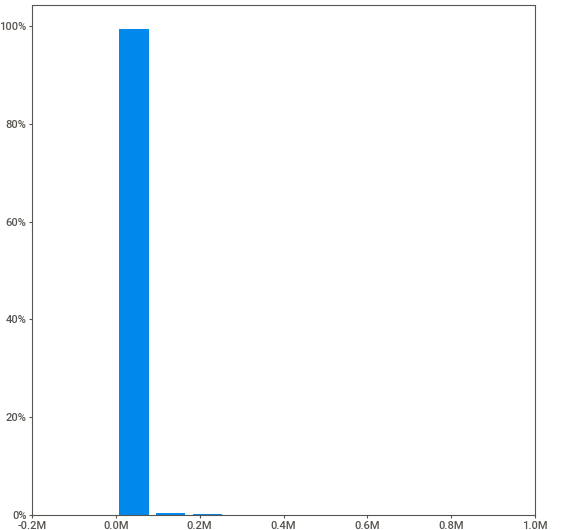
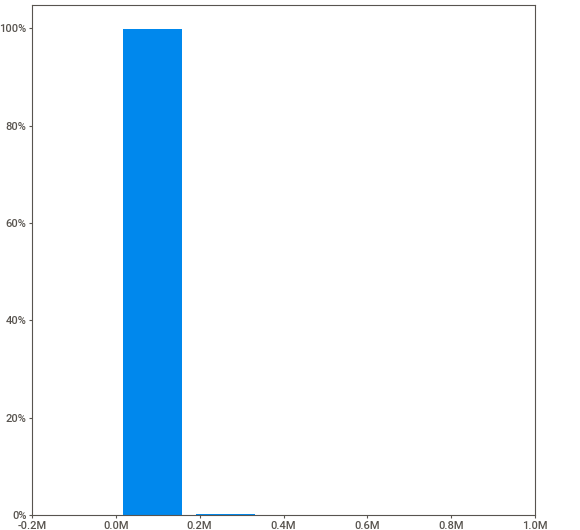
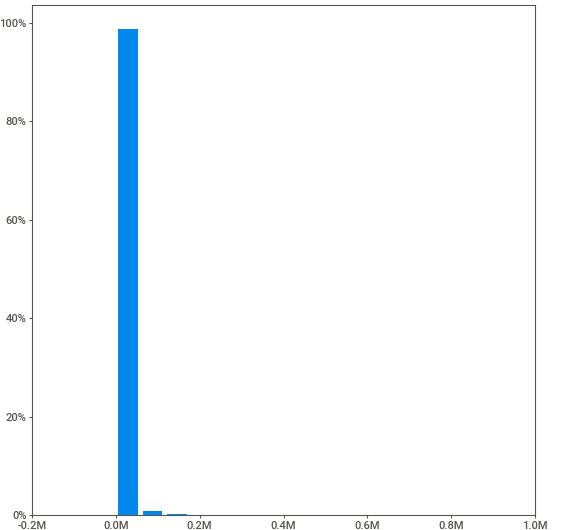
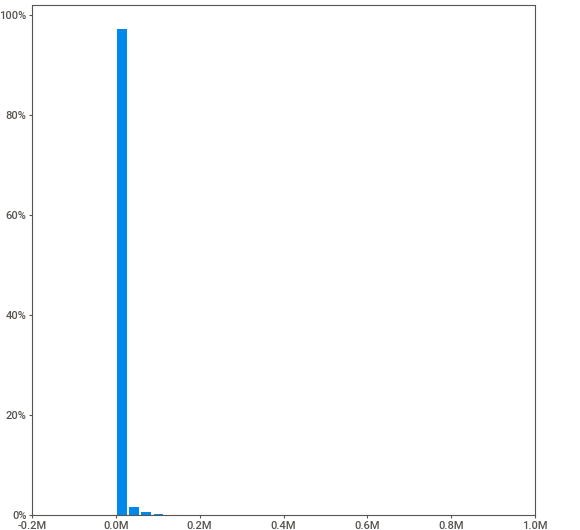
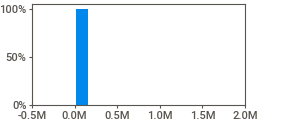
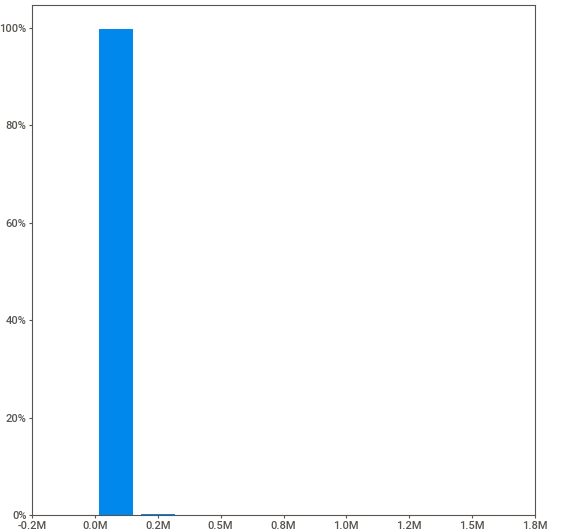
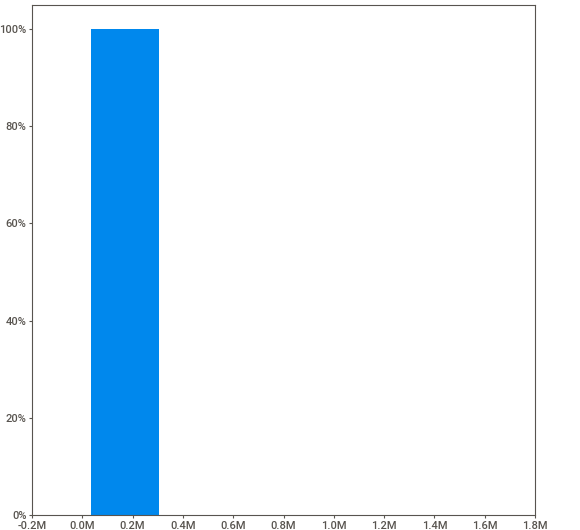
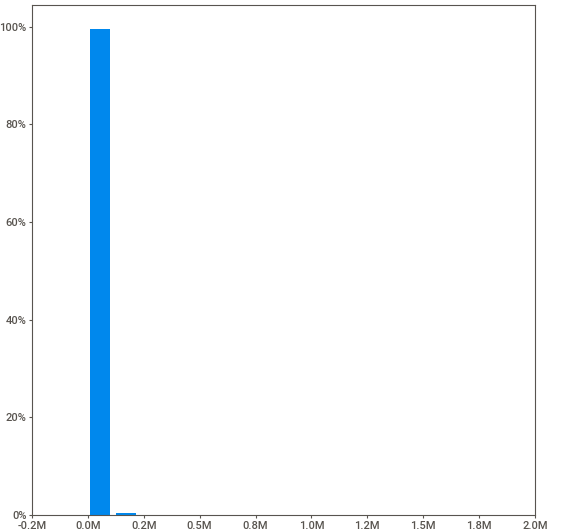
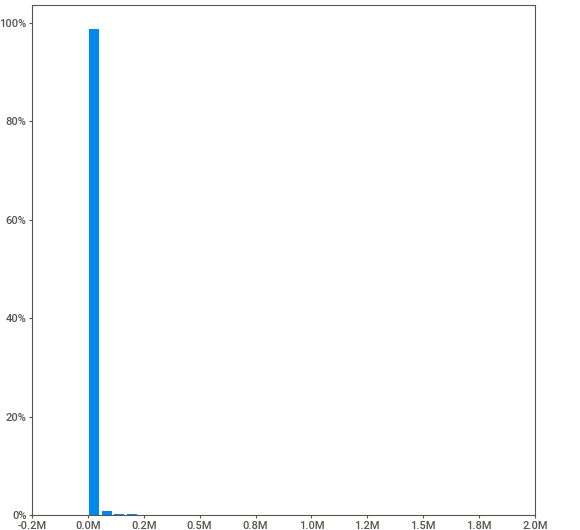
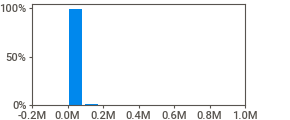
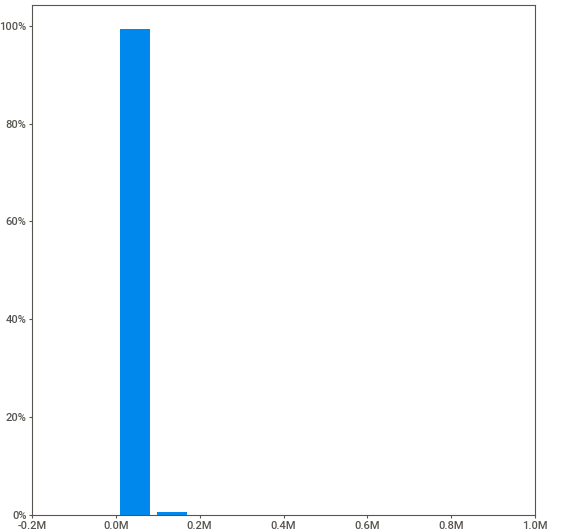
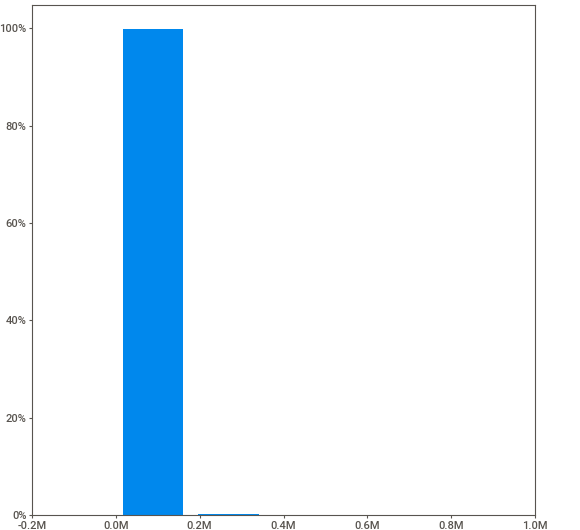
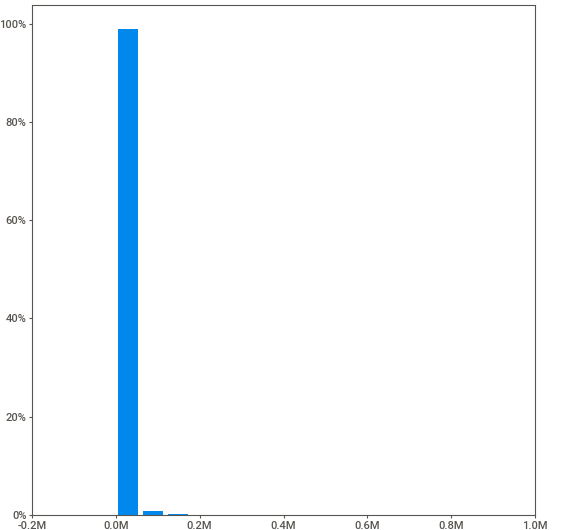
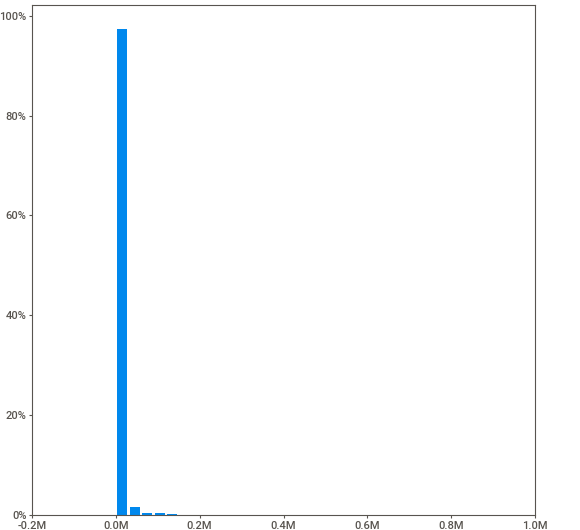
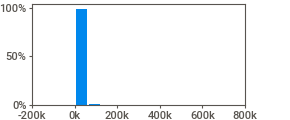
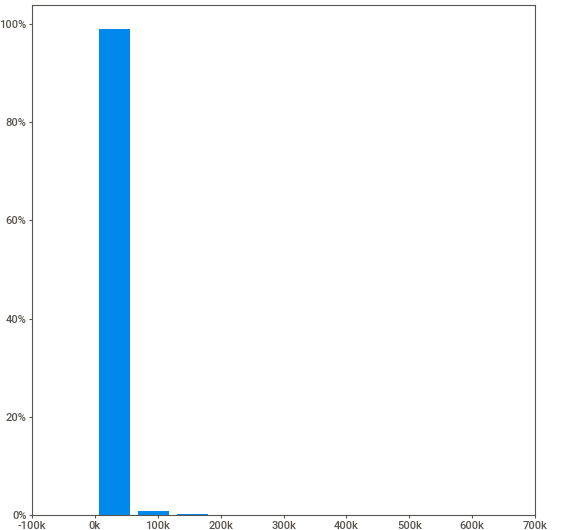
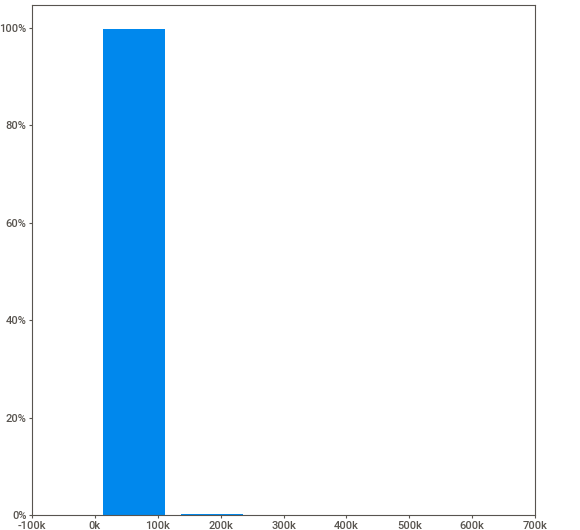
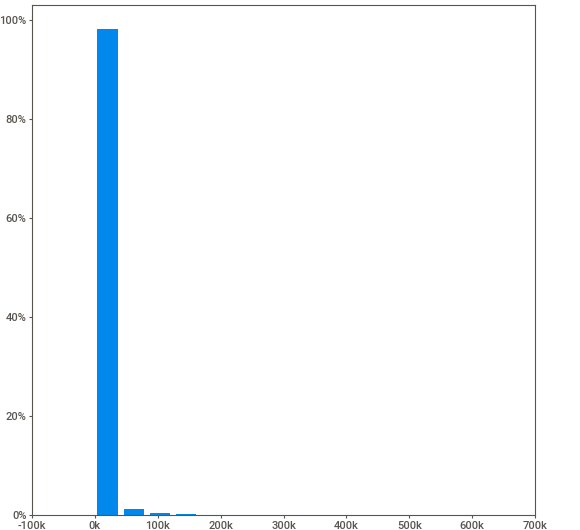
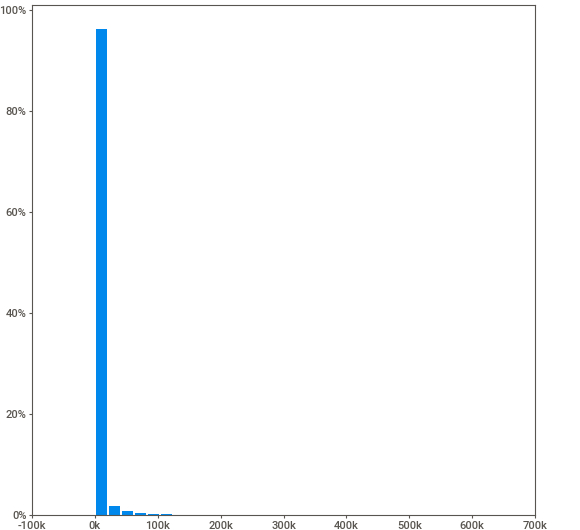
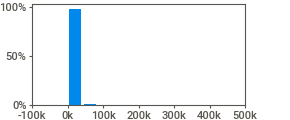
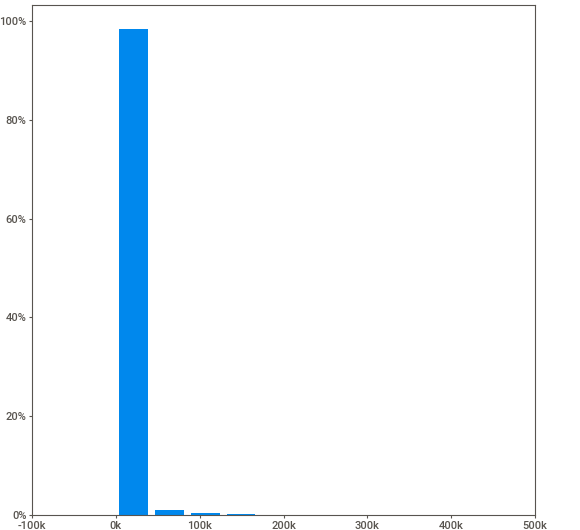
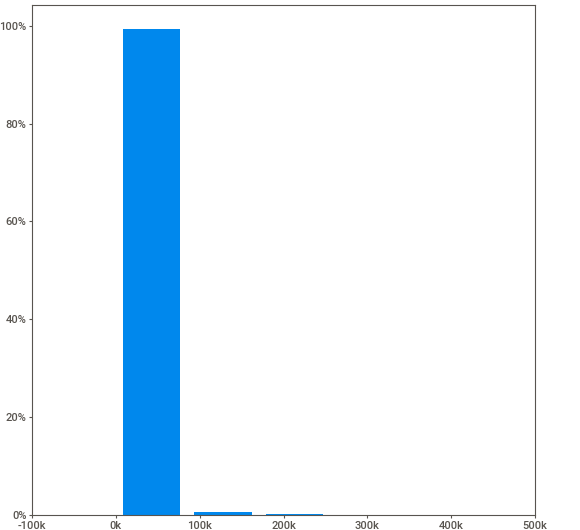
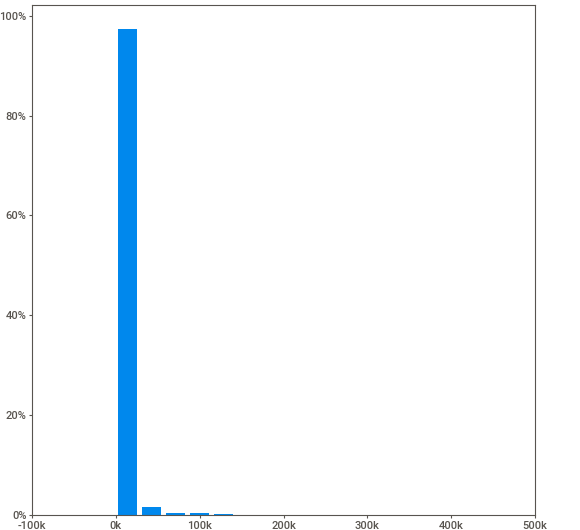
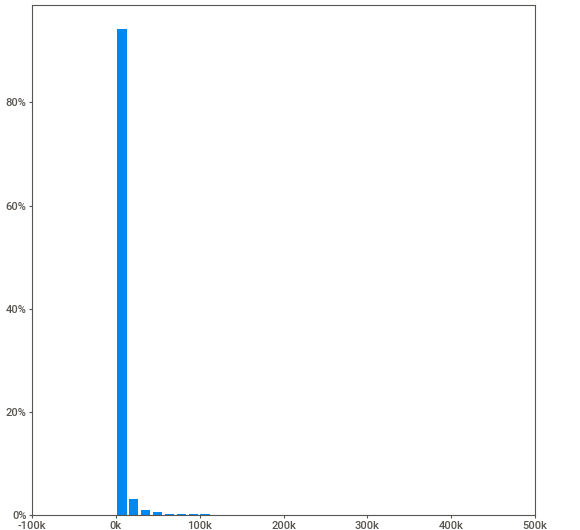
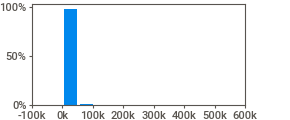
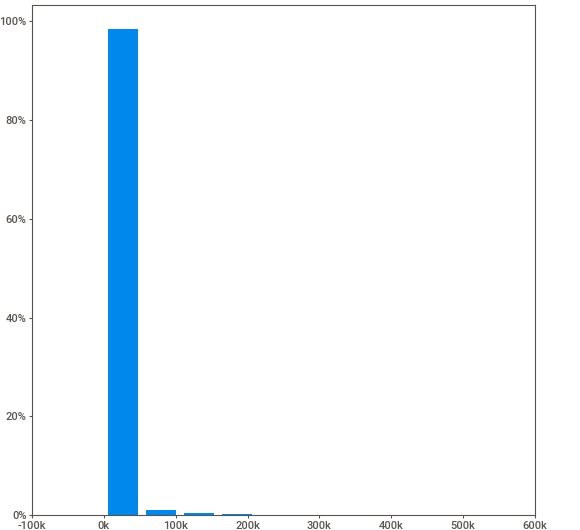
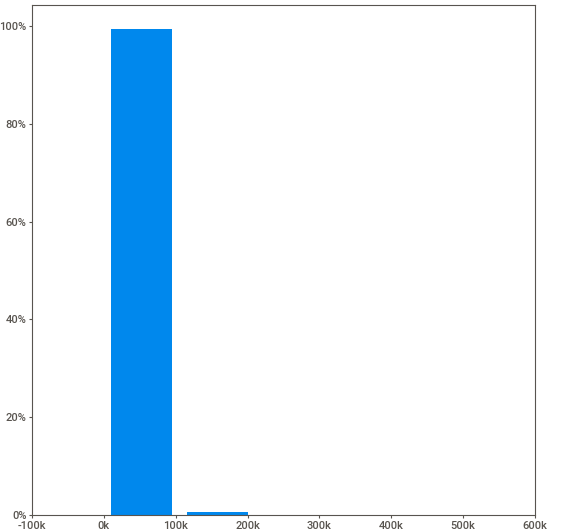
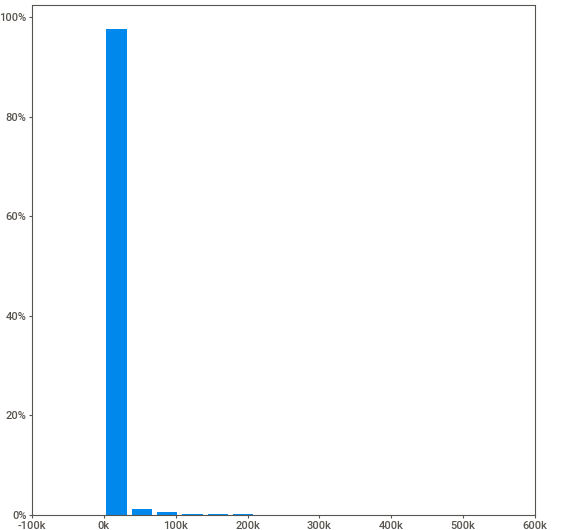
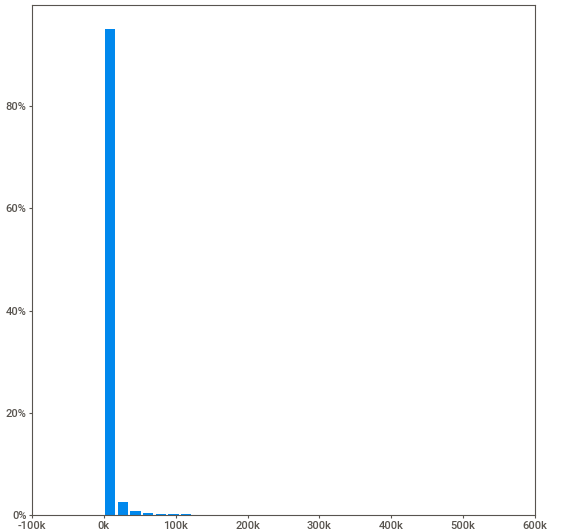
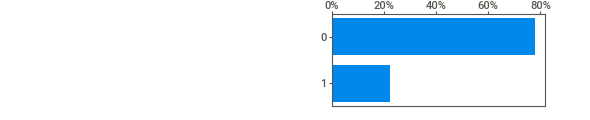
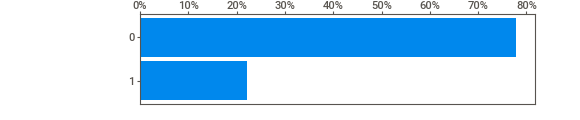
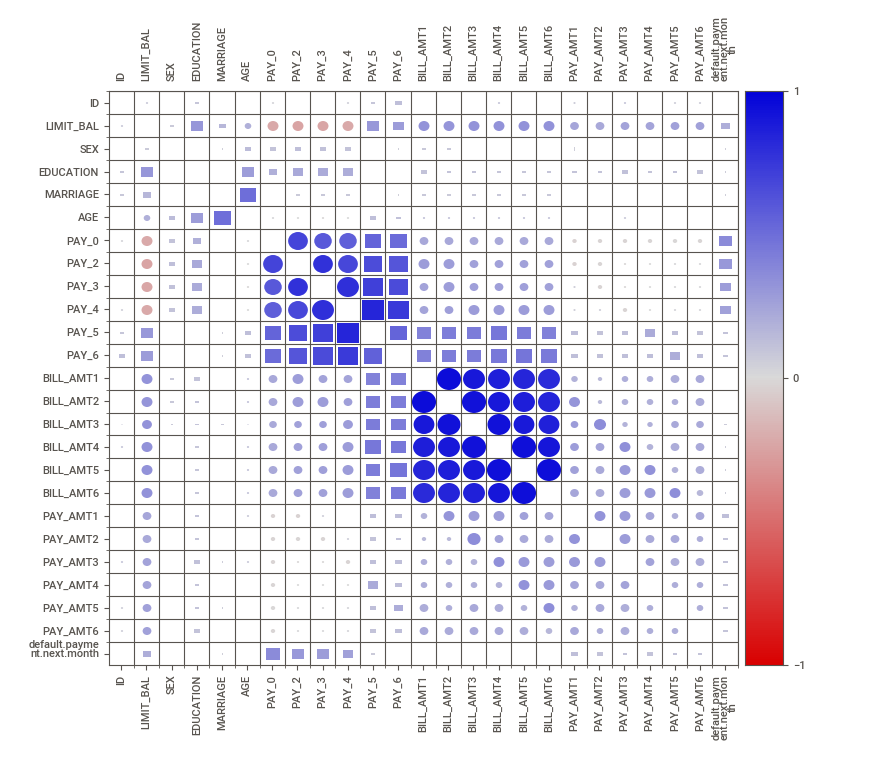
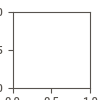

In [25]:
data2_amalyzed.show_notebook()


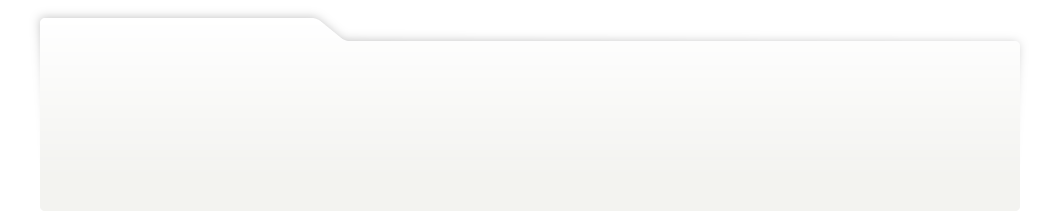
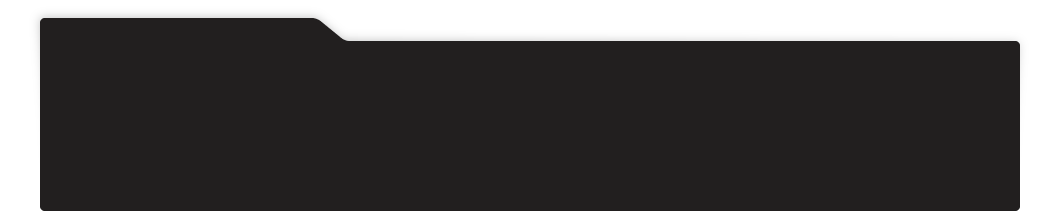
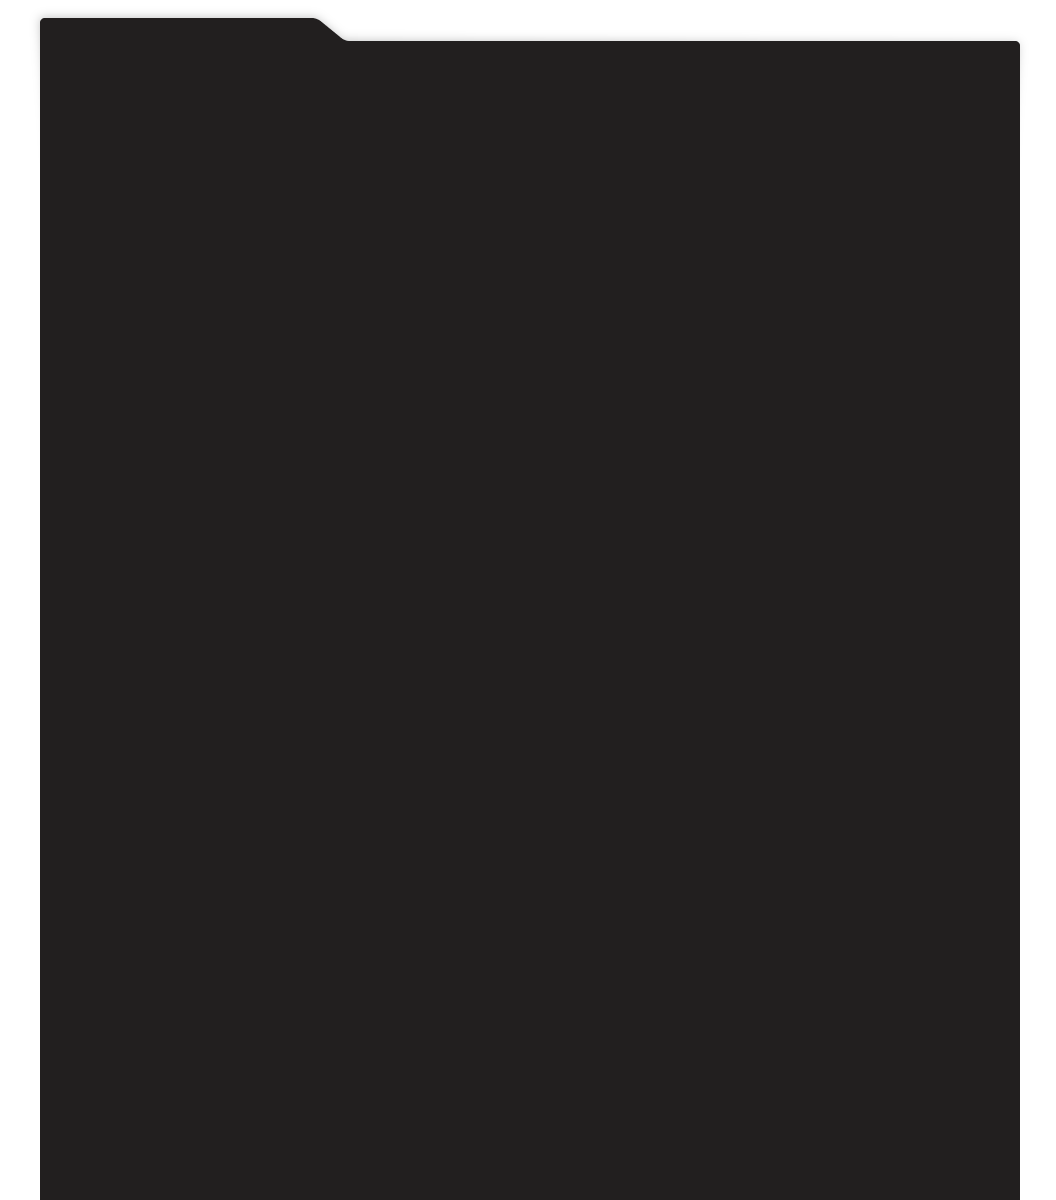
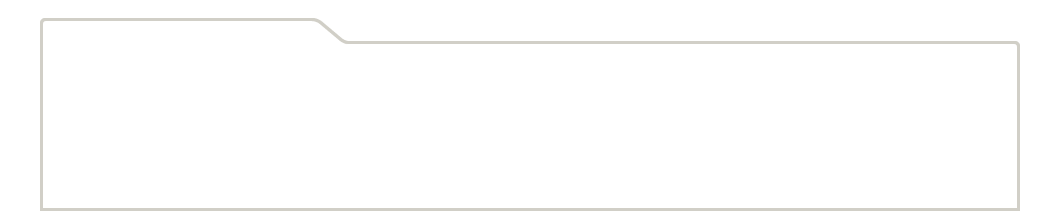
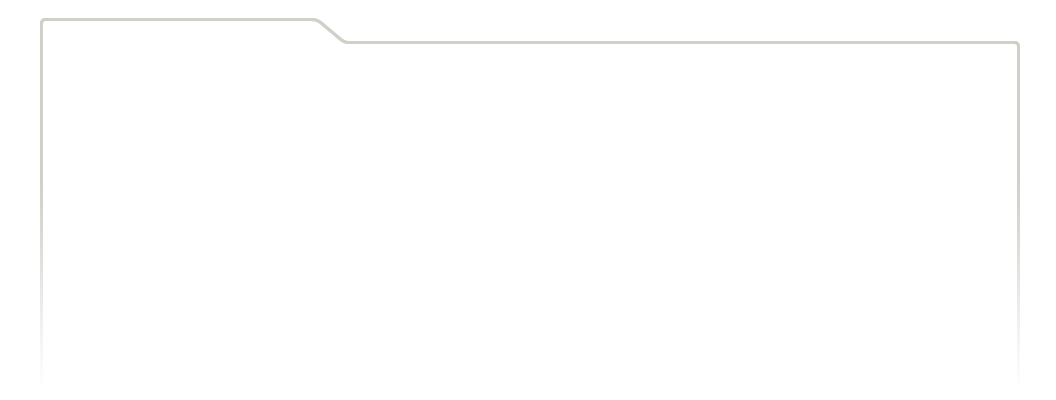
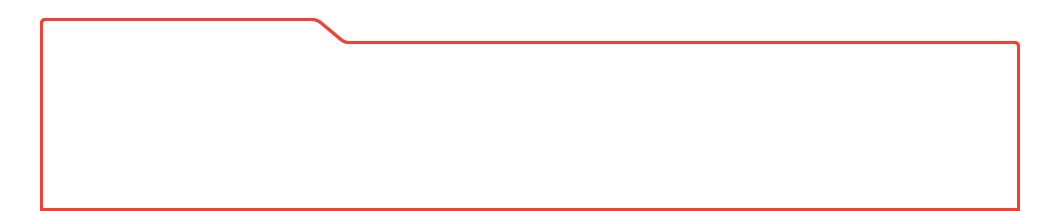
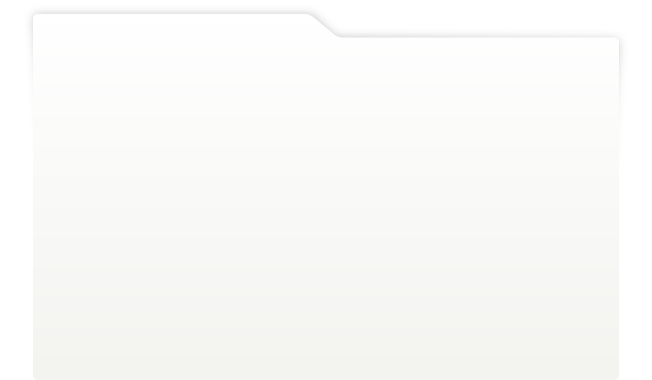
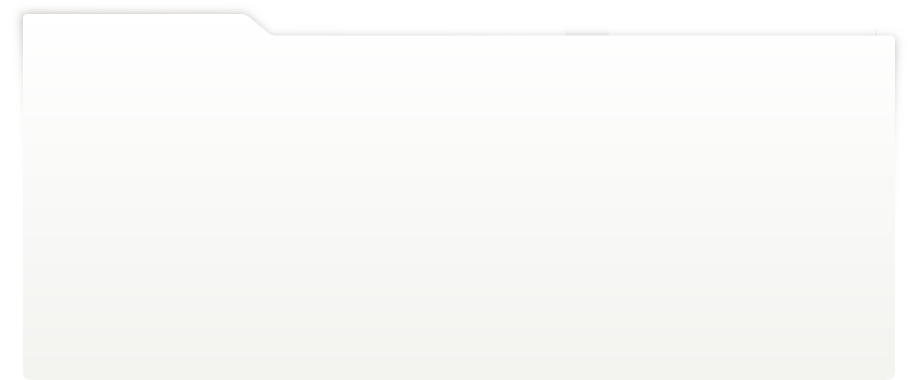
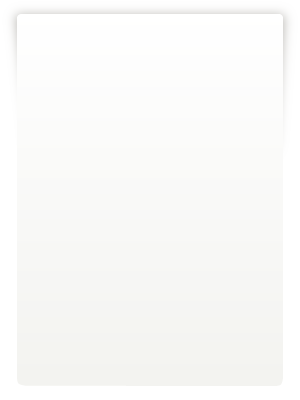
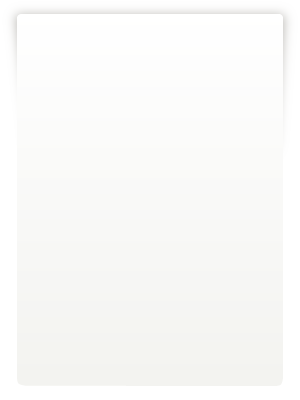
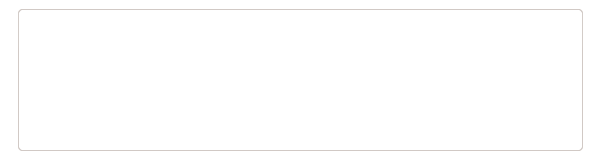
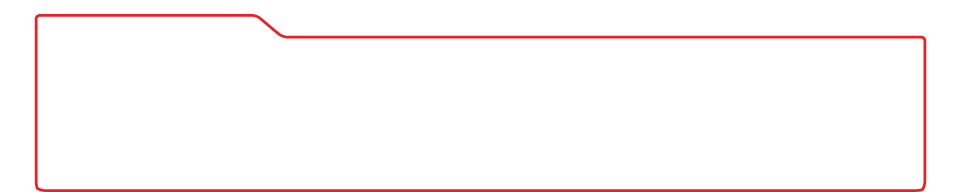
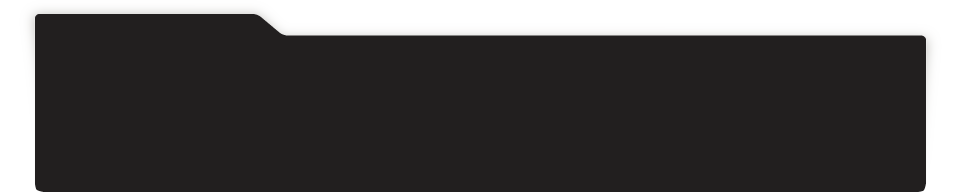
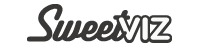
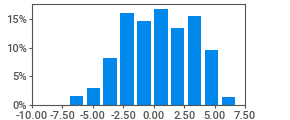
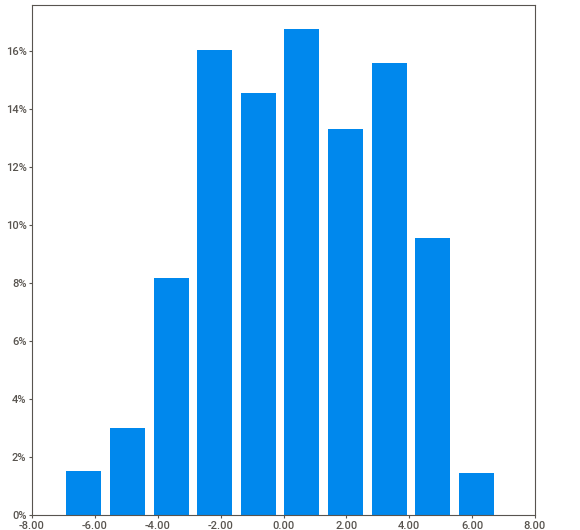
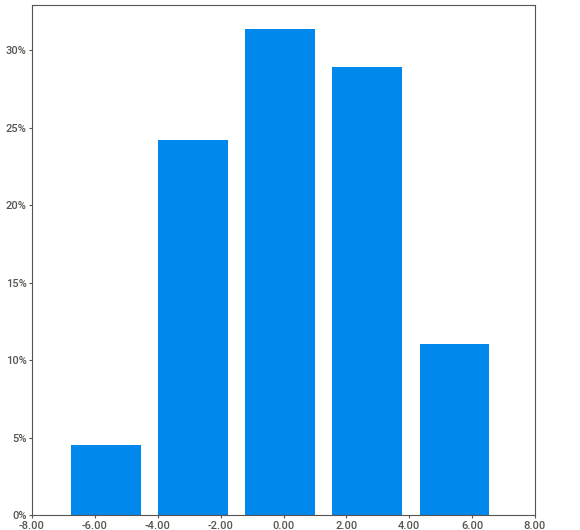
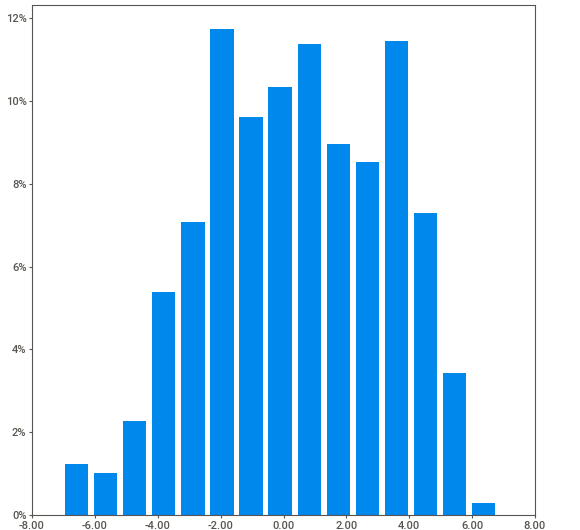
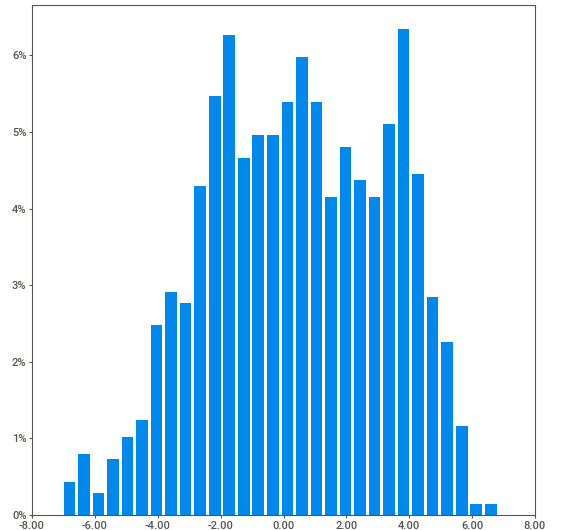
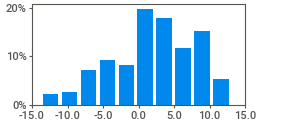
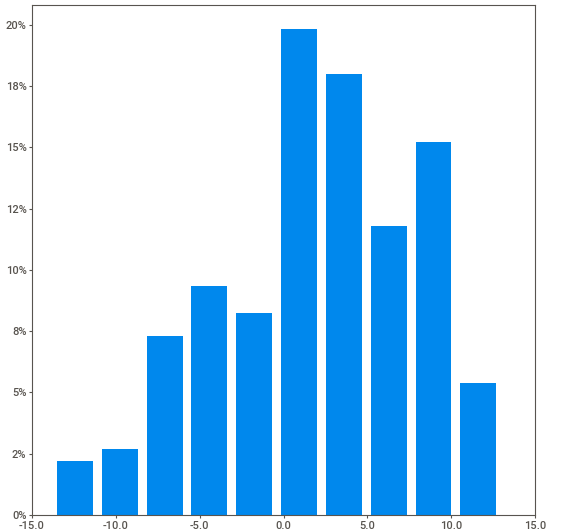
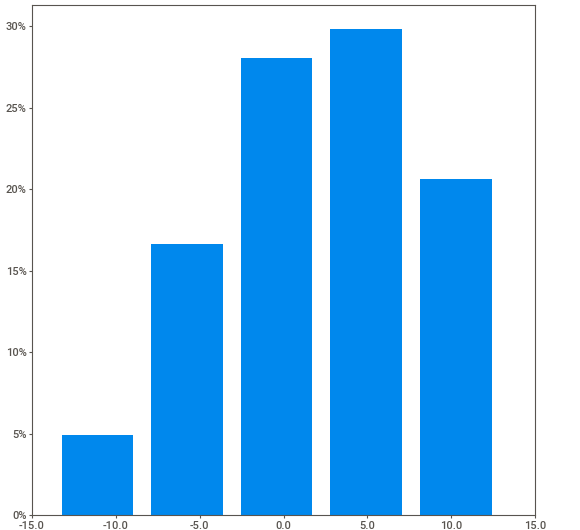
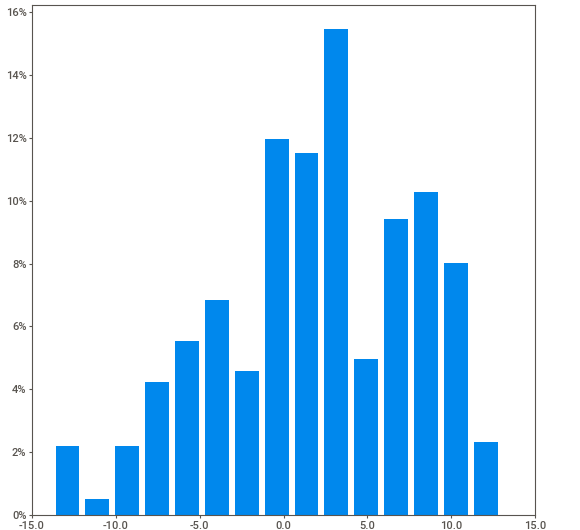
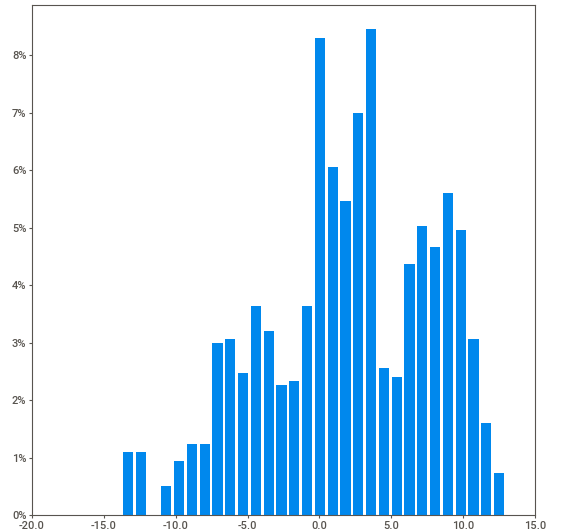
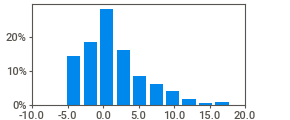
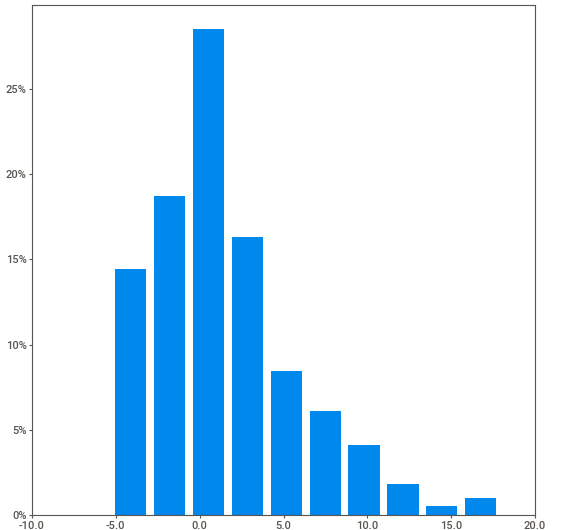
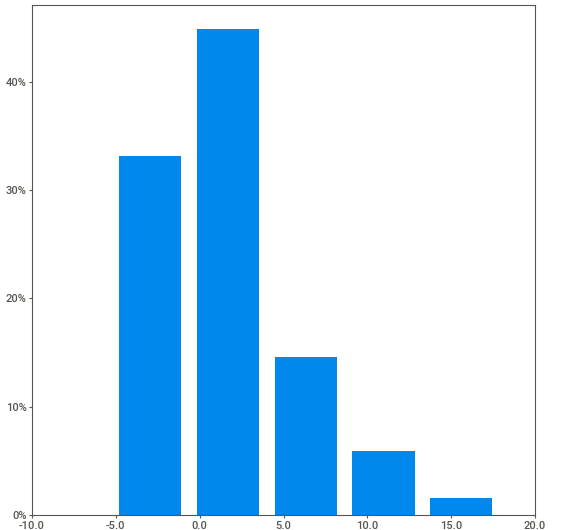
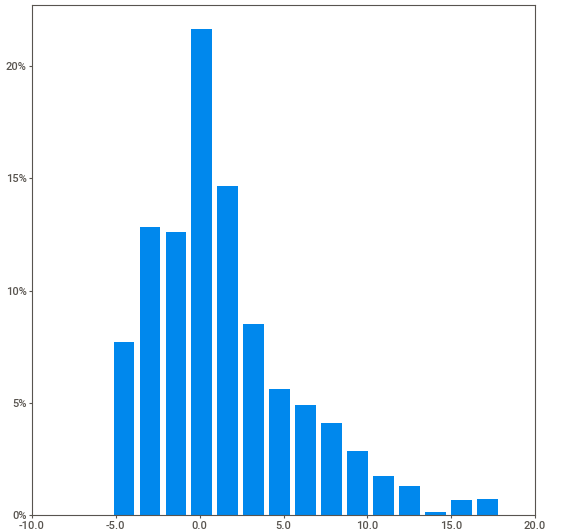
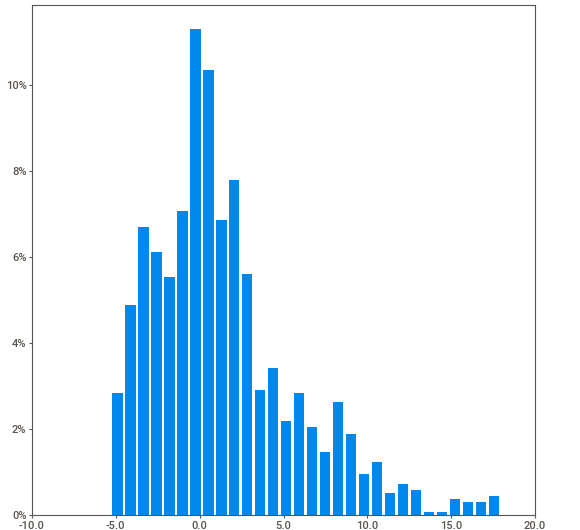
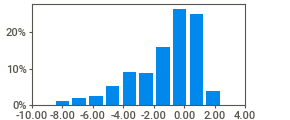
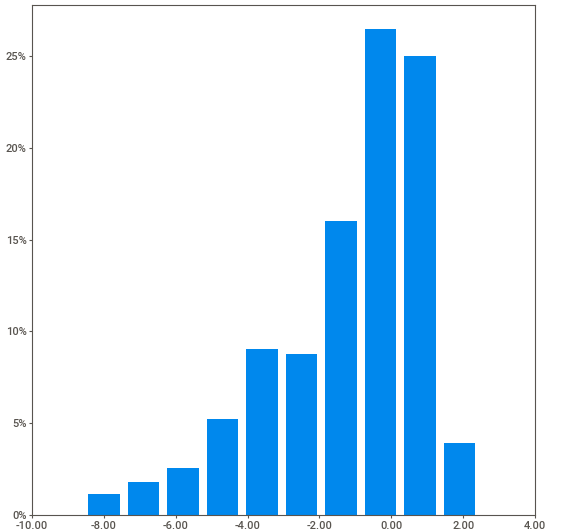
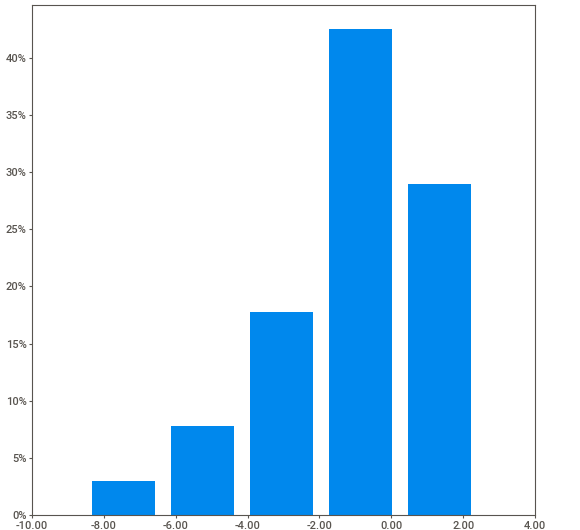
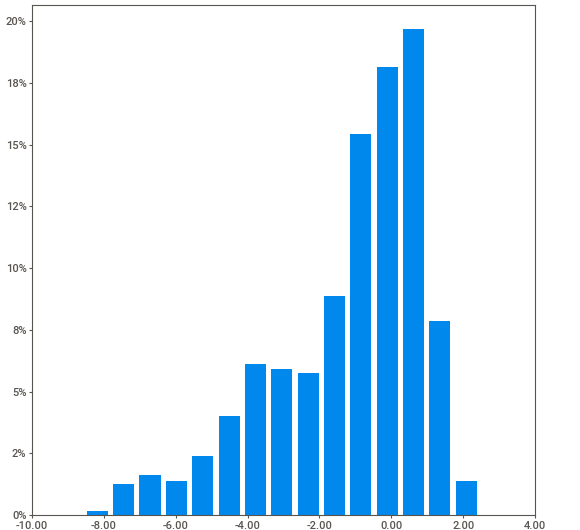
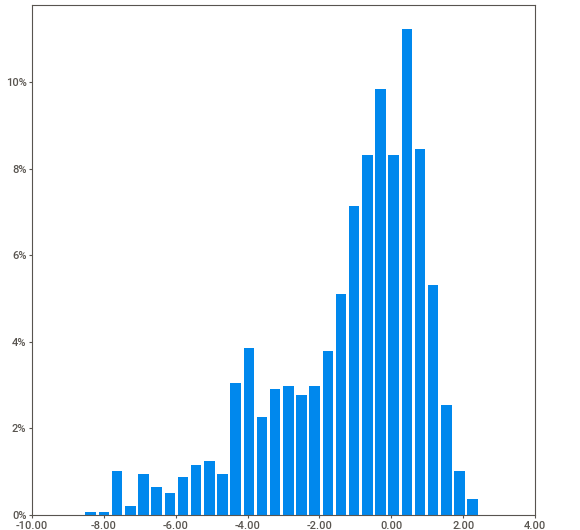
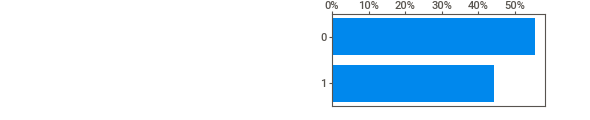
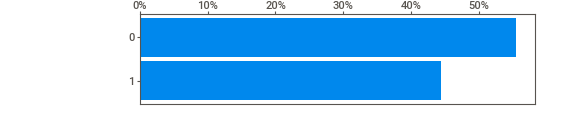
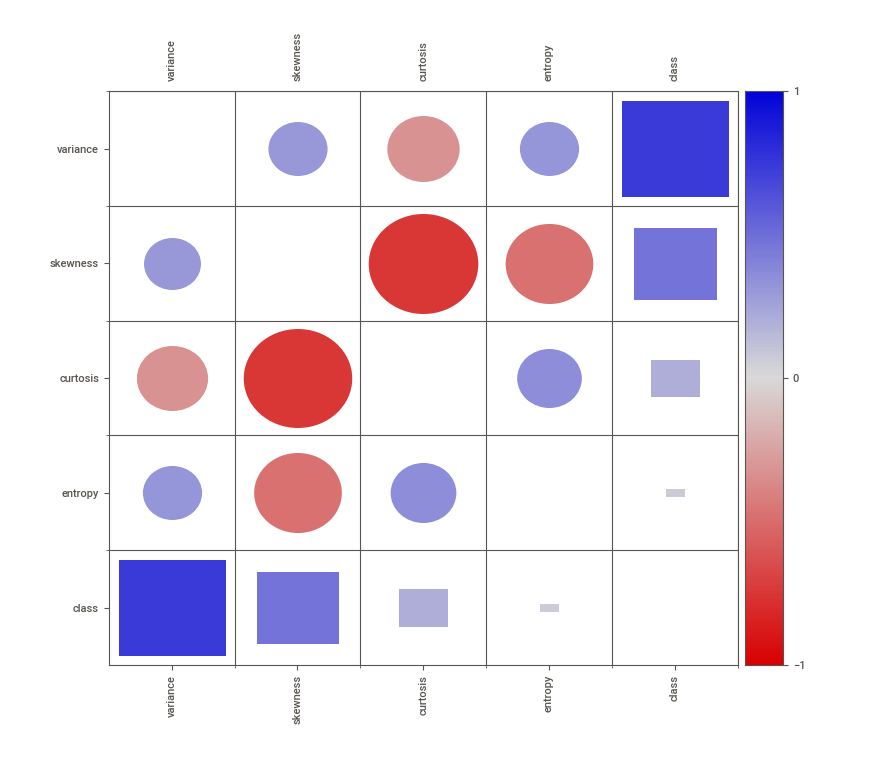
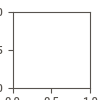

In [26]:
data3_analyzed.show_notebook()

## From the reports of the dataset obtained using sweetviz tells us that they have classes in given datasets are in the ratio 52-48, 60-40, and 56-44 and to formualise the approach to solve a imbalanced problem I will use the first dataset for the initial demonstration purpose.
## These steps will be replicated with other datasets.

In [31]:
mushroom_data_copy = mushroom_data.copy()

In [42]:
mushroom_data_categorical = mushroom_data_copy.astype("category")
mushroom_data_categorical.drop(columns=["class"], inplace=True)

In [43]:
labelencoder = LabelEncoder()
for column in mushroom_data_categorical.columns:
    mushroom_data_categorical[column] = labelencoder.fit_transform(mushroom_data_categorical[column])

In [44]:
mushroom_data_categorical

cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment  \
0             0            0          0        0     0                0   
1             0            0          1        0     1                0   
2             1            0          2        0     2                0   
3             0            1          2        0     0                0   
4             0            0          3        1     3                0   
...         ...          ...        ...      ...   ...              ...   
8119          4            0          0        1     3                1   
8120          0            0          0        1     3                1   
8121          3            0          0        1     3                1   
8122          4            1          0        1     6                0   
8123          0            0          0        1     3                1   

      gill-spacing  gill-size  gill-color  stalk-shape  ...  \
0                0          0           0            0  ...   
1                0          1           0            0  ...   
2                0          1           1            0  ...   
3                0          0           1            0  ...   
4                1          1           0            1  ...   
...            ...        ...         ...          ...  ...   
8119             0          1          10            0  ...   
8120             0          1          10            0  ...   
8121             0          1           1            0  ...   
8122             0          0           8            1  ...   
8123             0          1          10            0  ...   

      stalk-surface-below-ring  stalk-color-above-ring  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   
...                        ...                     ...   
8119                         0                       6   
8120                         0                       6   
8121                         0                       6   
8122                         3                       0   
8123                         0                       6   

      stalk-color-below-ring  veil-type  veil-color  ring-number  ring-type  \
0                          0          0           2            1          4   
1                          0          0           2            1          4   
2                          0          0           2            1          4   
3                          0          0           2            1          4   
4                          0          0           2            1          0   
...                      ...        ...         ...          ...        ...   
8119                       7          0           1            1          4   
8120                       7          0           0            1          4   
8121                       7          0           1            1          4   
8122                       0          0           2            1          0   
8123                       7          0           1            1          4   

      spore-print-color  population  habitat  
0                     2           3        5  
1                     3           2        1  
2                     3           2        3  
3                     2           3        5  
4                     3           0        1  
...                 ...         ...      ...  
8119                  0           1        2  
8120                  0           4        2  
8121                  0           1        2  
8122                  7           4        2  
8123                  4           1        2  

[8124 rows x 22 columns]

In [73]:
X = mushroom_data_categorical
y = mushroom_data['class']
y_map = {'e':'0', 'p':'1'}
y = y.map(y_map)

In [74]:
# now we will make the dataset imblance using the make imbalance from the imblearn package
# 65-35
imbalanced_65_X, imbalanced_65_y = make_imbalance(X,y, sampling_strategy={'0':2670,'1':1435})

In [75]:
# 75-25
imbalanced_75_X, imbalanced_75_y = make_imbalance(X,y, sampling_strategy={'0':3156,'1':979})

In [76]:
# 75-25
imbalanced_90_X, imbalanced_90_y = make_imbalance(X,y, sampling_strategy={'0':3761,'1':418})

In [77]:
x_train, x_test, y_train, y_test = train_test_split(imbalanced_65_X,imbalanced_65_y,random_state=42,test_size=0.2) 

In [78]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train,y_train)
y_predicted_test = rf.predict(x_test)
print(f"Test Accuracy: {accuracy_score(y_test, y_predicted_test)}")
print(f"Classification Report: {classification_report(y_test,y_predicted_test)}")

Test Accuracy: 1.0
Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00       576
           1       1.00      1.00      1.00       245

    accuracy                           1.00       821
   macro avg       1.00      1.00      1.00       821
weighted avg       1.00      1.00      1.00       821



In [82]:
x_train, x_test, y_train, y_test = train_test_split(imbalanced_75_X,imbalanced_75_y,random_state=42,test_size=0.2) 

In [83]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train,y_train)
y_predicted_test = rf.predict(x_test)
print(f"Test Accuracy: {accuracy_score(y_test, y_predicted_test)}")
print(f"Classification Report: {classification_report(y_test,y_predicted_test)}")

Test Accuracy: 1.0
Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00       642
           1       1.00      1.00      1.00       185

    accuracy                           1.00       827
   macro avg       1.00      1.00      1.00       827
weighted avg       1.00      1.00      1.00       827



In [85]:
x_train, x_test, y_train, y_test = train_test_split(imbalanced_90_X,imbalanced_90_y,random_state=42,test_size=0.2) 

In [86]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train,y_train)
y_predicted_test = rf.predict(x_test)
print(f"Test Accuracy: {accuracy_score(y_test, y_predicted_test)}")
print(f"Classification Report: {classification_report(y_test,y_predicted_test)}")

Test Accuracy: 0.9988038277511961
Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00       758
           1       1.00      0.99      0.99        78

    accuracy                           1.00       836
   macro avg       1.00      0.99      1.00       836
weighted avg       1.00      1.00      1.00       836

